In [221]:
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

## Import Fluxes

## Upscaling of Biomass Growth Time-Series

In [2]:
hdf5_file = h5py.File(h5_files[10], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
time_steps

NameError: name 'h5py' is not defined

In [3]:
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# Display the first few sorted items as a sample
sorted_time_strings[:10]  # Displaying only the first 10 items for brevity

sorted_time_strings[-95:-20]

NameError: name 'time_n' is not defined

## Get Scales

In [1]:
import h5py
import cv2
import torch
import os
#for upsampling files
#base_dir = '../../../input_files/'
#for upscaling files
base_dir = '../../one_deeper/input_files/'

f_dir = os.listdir(base_dir)
h5_files = []
h5_files2x = []

# Iterate over all files in the directory
## Upscaling
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("1x" in filename))):
        h5_files.append(base_dir+filename)
    elif (filename.endswith(".h5")) & ((("10x" in filename))):
        h5_files2x.append(base_dir+filename)
## Upsampling        
# for filename in f_dir:
#     if (filename.endswith(".h5")) & ((("1xresolution" in filename))):
#         h5_files.append(base_dir+filename)
#     elif (filename.endswith(".h5")) & ((("2xresolution" in filename))):
#         h5_files2x.append(base_dir+filename)
h5_files

['../../one_deeper/input_files/gaining_17_22_1xscale.h5',
 '../../one_deeper/input_files/gaining_22_16_1xscale.h5',
 '../../one_deeper/input_files/gaining_25_15_1xscale.h5',
 '../../one_deeper/input_files/gaining_27_7_1xscale.h5',
 '../../one_deeper/input_files/gaining_30_15_1xscale.h5',
 '../../one_deeper/input_files/gaining_33_24_1xscale.h5',
 '../../one_deeper/input_files/gaining_34_6_1xscale.h5',
 '../../one_deeper/input_files/gaining_36_11_1xscale.h5',
 '../../one_deeper/input_files/gaining_38_16_1xscale.h5',
 '../../one_deeper/input_files/gaining_40_17_1xscale.h5',
 '../../one_deeper/input_files/gaining_41_12_1xscale.h5',
 '../../one_deeper/input_files/gaining_42_11_1xscale.h5',
 '../../one_deeper/input_files/gaining_46_17_1xscale.h5',
 '../../one_deeper/input_files/gaining_49_10_1xscale.h5',
 '../../one_deeper/input_files/gaining_49_24_1xscale.h5',
 '../../one_deeper/input_files/gaining_51_10_1xscale.h5',
 '../../one_deeper/input_files/hanford_diff_lose_14_10_1xscale.h5',
 '../.

In [2]:
h5_files2x

['../../one_deeper/input_files/gaining_17_22_10xscale.h5',
 '../../one_deeper/input_files/gaining_22_16_10xscale.h5',
 '../../one_deeper/input_files/gaining_25_15_10xscale.h5',
 '../../one_deeper/input_files/gaining_27_7_10xscale.h5',
 '../../one_deeper/input_files/gaining_30_15_10xscale.h5',
 '../../one_deeper/input_files/gaining_33_24_10xscale.h5',
 '../../one_deeper/input_files/gaining_34_6_10xscale.h5',
 '../../one_deeper/input_files/gaining_36_11_10xscale.h5',
 '../../one_deeper/input_files/gaining_38_16_10xscale.h5',
 '../../one_deeper/input_files/gaining_40_17_10xscale.h5',
 '../../one_deeper/input_files/gaining_41_12_10xscale.h5',
 '../../one_deeper/input_files/gaining_42_11_10xscale.h5',
 '../../one_deeper/input_files/gaining_46_17_10xscale.h5',
 '../../one_deeper/input_files/gaining_49_10_10xscale.h5',
 '../../one_deeper/input_files/gaining_49_24_10xscale.h5',
 '../../one_deeper/input_files/gaining_51_10_10xscale.h5',
 '../../one_deeper/input_files/hanford_diff_lose_14_10_10x

In [3]:
import numpy as np
def get_modified_time(filename):
    return os.path.getmtime(filename)

# Sorting the list of filenames based on the last modified time
h5_files = np.sort(h5_files)#sorted(h5_files, key=get_modified_time)#[0:-1]
#h5_files_train = np.sort(h5_files_train)#sorted(h5_files_train, key=get_modified_time)
h5_files2x = np.sort(h5_files2x)
hdf5_file = h5py.File(h5_files[0], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

In [4]:
len(sorted_time_strings)

114

In [5]:
features=[#'Chubbite_Rate [mol_m^3_sec]',
  #'Chubbite_VF [m^3 mnrl_m^3 bulk]',
  #'Liquid X-Velocity [m_per_h]',
  #'Liquid Y-Velocity [m_per_h]',
  #'Liquid Z-Velocity [m_per_h]',
  #'Liquid_Pressure [Pa]',
  #'Liquid_Saturation',
  #'Material_ID',
  #'Permeability_X [m^2]',
  #'Porosity',
  #'Temperature [C]',
  #'Total_CO2 [M]',
  #'Total_Cr(VI) [M]',
  #'Total_O2 [M]',
  #'Total_biocide [M]',
  #'Total_ethanol [M]',
  #'Total_molasses [M]',
  'biomass [mol_m^3]',
]
num_time_steps = len(sorted_time_strings)
num_features = 1  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]


# Extracting and reshaping data from the first five time steps
perm_covar=[]
max_l=[]
growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
scales = np.zeros([len(h5_files), len(features),4])
scale_t=np.zeros([num_time_steps,4])

for i in range(len(h5_files)):
    print (h5_files[i], h5_files2x[i])
    hdf5_file = h5py.File(h5_files[i], 'r')
    hdf5_file2x = h5py.File(h5_files2x[i], 'r')
    for f_idx, feature in enumerate(features):
        for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
            dataset = hdf5_file[time_step][feature]
            datay = hdf5_file2x[time_step][feature]
            #dataset = np.log(dataset[:,:,0]+1e-30)
            #datay = np.log(datay[:,:,0]+1e-30)

            scale_t[t_idx,0]=np.min(dataset)
            scale_t[t_idx,1]=np.max(dataset)
            scale_t[t_idx,2]=np.mean(dataset)
            scale_t[t_idx,3]=np.std(dataset)
                

        scales[i,f_idx,0] = np.min(scale_t[:,0])
        scales[i,f_idx,1] = np.max(scale_t[:,1])
        scales[i,f_idx,2] = np.mean(scale_t[:,2])
        scales[i,f_idx,3] = np.mean(scale_t[:,3])

../../one_deeper/input_files/gaining_17_22_1xscale.h5 ../../one_deeper/input_files/gaining_17_22_10xscale.h5
../../one_deeper/input_files/gaining_22_16_1xscale.h5 ../../one_deeper/input_files/gaining_22_16_10xscale.h5
../../one_deeper/input_files/gaining_25_15_1xscale.h5 ../../one_deeper/input_files/gaining_25_15_10xscale.h5
../../one_deeper/input_files/gaining_27_7_1xscale.h5 ../../one_deeper/input_files/gaining_27_7_10xscale.h5
../../one_deeper/input_files/gaining_30_15_1xscale.h5 ../../one_deeper/input_files/gaining_30_15_10xscale.h5
../../one_deeper/input_files/gaining_33_24_1xscale.h5 ../../one_deeper/input_files/gaining_33_24_10xscale.h5
../../one_deeper/input_files/gaining_34_6_1xscale.h5 ../../one_deeper/input_files/gaining_34_6_10xscale.h5
../../one_deeper/input_files/gaining_36_11_1xscale.h5 ../../one_deeper/input_files/gaining_36_11_10xscale.h5
../../one_deeper/input_files/gaining_38_16_1xscale.h5 ../../one_deeper/input_files/gaining_38_16_10xscale.h5
../../one_deeper/input_

In [7]:
sorted_time_strings

['Time:  0.00000E+00 h',
 'Time:  4.80000E+01 h',
 'Time:  9.60000E+01 h',
 'Time:  1.44000E+02 h',
 'Time:  1.92000E+02 h',
 'Time:  2.40000E+02 h',
 'Time:  2.88000E+02 h',
 'Time:  3.36000E+02 h',
 'Time:  3.84000E+02 h',
 'Time:  4.32000E+02 h',
 'Time:  4.80000E+02 h',
 'Time:  5.28000E+02 h',
 'Time:  5.76000E+02 h',
 'Time:  6.24000E+02 h',
 'Time:  6.72000E+02 h',
 'Time:  7.20000E+02 h',
 'Time:  7.68000E+02 h',
 'Time:  8.16000E+02 h',
 'Time:  8.64000E+02 h',
 'Time:  9.12000E+02 h',
 'Time:  9.60000E+02 h',
 'Time:  1.00800E+03 h',
 'Time:  1.05600E+03 h',
 'Time:  1.10400E+03 h',
 'Time:  1.15200E+03 h',
 'Time:  1.20000E+03 h',
 'Time:  1.24800E+03 h',
 'Time:  1.29600E+03 h',
 'Time:  1.34400E+03 h',
 'Time:  1.39200E+03 h',
 'Time:  1.44000E+03 h',
 'Time:  1.48800E+03 h',
 'Time:  1.53600E+03 h',
 'Time:  1.58400E+03 h',
 'Time:  1.63200E+03 h',
 'Time:  1.68000E+03 h',
 'Time:  1.72800E+03 h',
 'Time:  1.77600E+03 h',
 'Time:  1.82400E+03 h',
 'Time:  1.87200E+03 h',


In [5]:
len(h5_files)

60

In [6]:
h5_files_train

NameError: name 'h5_files_train' is not defined

In [10]:
len(h5_files2x)

26

In [8]:
max_scales = np.zeros(len(features))
min_scales = np.zeros(len(features))
mean_scales = np.zeros(len(features))
std_scales = np.zeros(len(features))

for i in range(scales.shape[1]):
    min_scales[i] = np.min(scales[:,i,0])
    max_scales[i] = np.max(scales[:,i,1])
    mean_scales[i] = np.mean(scales[:,i,2])
    std_scales[i] = np.mean(scales[:,i,3])
max_scales

array([765.37635563])

In [9]:
min_scales


array([1.e-10])

## Save as .pt for quick loading during training

In [176]:
# #For bio, use min-max 
# #For molasses, use min-max with MSLE loss
# fname='C:/Users/marcb/Desktop/pflotran_stomp/pflotran_stomp_input_v3.h5'
# hdf5_file = h5py.File(fname, 'r')
# # Fetching the first five time steps
# time_n = list(hdf5_file.keys())[2:]
# time_steps = np.linspace(0,len(time_n),len(time_n)+1)
# import re

# # List of strings
# time_strings = time_n

# # Function to extract the numerical value from the string
# def extract_numeric_value(s):
#     # Find the pattern in the string
#     match = re.search(r'\d+\.\d+E\+\d+', s)
#     # Convert to float and return
#     return float(match.group()) if match else 0

# # Sort the list based on the extracted numeric value
# sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# hdf5_file = h5py.File(fname, 'r')
# y_uran = np.zeros((53, 56, 40, 43))
# for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
#     dataset = hdf5_file[time_step]['Total_UO2++ [M]']
#     y_uran[ t_idx, :, :, :] = dataset[:, :, :]

Text(0.5, 0, 'Time (days)')

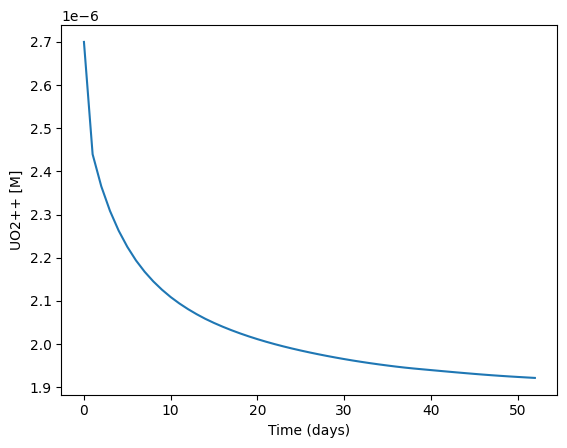

In [184]:
# plt.plot(np.mean(y_uran, axis=(1,2,3)))
# plt.ylabel('UO2++ [M]')
# plt.xlabel('Time (days)')


In [13]:
# Number of time steps and features to extract
#file_path = '/mnt/data/high_losing_42_11_1xscale.h5'
import h5py
import cv2
import torch

#h5_files_train = h5_files_train[0:5]
hdf5_file = h5py.File(h5_files[0], 'r')
# Fetching the first five time steps
time_n = list(hdf5_file.keys())[2:]
time_steps = np.linspace(0,len(time_n),len(time_n)+1)
import re

# List of strings
time_strings = time_n

# Function to extract the numerical value from the string
def extract_numeric_value(s):
    # Find the pattern in the string
    match = re.search(r'\d+\.\d+E\+\d+', s)
    # Convert to float and return
    return float(match.group()) if match else 0

# Sort the list based on the extracted numeric value
sorted_time_strings = sorted(time_strings, key=extract_numeric_value)

# Inspecting the features present in each of these time steps
#features_per_time_step = {time_step: list(hdf5_file[time_step].keys()) for time_step in time_steps}


num_time_steps = len(sorted_time_strings)
num_features = len(features)  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]


# Extracting and reshaping data from the first five time steps
perm_covar=[]
max_l=[]
growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
tag_scales = []
for i in range(0,len(h5_files)):
    hdf5_file = h5py.File(h5_files[i], 'r')
    hdf5_file2x = h5py.File(h5_files2x[i], 'r')
    y = np.zeros((num_time_steps, 100, 2000, num_features))
    x = np.zeros((num_time_steps, 100, 200, num_features))
    for t_idx, time_step in enumerate(sorted_time_strings):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features):
            #if ('molass' not in feature)&('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
            dataset = hdf5_file2x[time_step][feature]
            y[t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
            
            dataset = hdf5_file[time_step][feature]
            x[ t_idx, :, :, count] = dataset[:, :, 0]




    #x = np.log(x+1e-30)
    #y = np.log(y+1e-30)
    for j in range(x.shape[3]):
        # xmean = mean_scales[j]
        # xstd = std_scales[j]
        # x[:,:,:,j] = (x[:,:,:,j] - xmean)/(xstd)
        # y[:,:,:,j] = (y[:,:,:,j] - xmean)/(xstd)
        # x1[:,:,:,j] = (x1[:,:,:,j] - xmean)/(xstd)
        xmin = min_scales[j]
        xmax = max_scales[j]
        x[:,:,:,j] = (x[:,:,:,j] - xmin)/(xmax-xmin)
        #x[:,:,:,j] = (x[:,:,:,j]*.99)+.01
        y[:,:,:,j] = (y[:,:,:,j] - xmin)/(xmax-xmin)
        #y[:,:,:,j] = (y[:,:,:,j]*.99)+.01
        
    #if 'high_gaining' in h5_files[i]:
    #    perm_covar=int(h5_files[i].split('_')[5])/int(h5_files[i].split('_')[6])
    #else:
     #   perm_covar=int(h5_files[i].split('_')[4])/int(h5_files[i].split('_')[5])
  
    
    #if 'high_gaining' in h5_files[i]:
    #    max_l=np.max([int(h5_files[i].split('_')[5]),int(h5_files[i].split('_')[6])])
    #else:
    #    max_l=np.max([int(h5_files[i].split('_')[4]),int(h5_files[i].split('_')[5])])
    #max_l
    
    file_path = h5_files[i][:-3]+'.in'
    print (file_path)
    # x1 = torch.tensor(x1)
    # x1 = x1.repeat_interleave(2, dim=2)
    #with open(file_path, 'r') as file:
    #    lines = file.readlines()
    #gr = float(lines[79].split()[1].replace('d', 'e'))
    #c = float(lines[81].split()[1].replace('d', 'e'))
    #d = float(lines[94].split()[1].replace('d', 'e'))
    #b = float(lines[65].split()[1])

    #c = c*1e10
    #b = b/2.5
    #max_l = max_l/10
    #gr = gr*1e5


    #tags =[c, d, b, max_l, perm_covar, gr]
    #count=0
    
    #tags_small = np.zeros([100,100,400,1])
    #tags_small[:,0:16, :, :] = torch.full((114,16,400,1),tags[0])
    #tags_small[:,16:32, :, :] = torch.full((114,16,400,1),tags[1])
    #tags_small[:,32:48, :, :] = torch.full((114,16,400,1),tags[2])
    #tags_small[:,48:64, :, :] = torch.full((114,16,400,1),tags[3])
    ##tags_small[:,64:80, :, :] = torch.full((114,16,400,1),tags[4])
    #tags_small[:,80:, :, :] = torch.full((114,20,400,1),tags[5])

    #tags_big = np.zeros([100,100,2000,1])
    #tags_big[:,0:16, :, :] = torch.full((114,16,2000,1),tags[0])
    #tags_big[:,16:32, :, :] = torch.full((114,16,2000,1),tags[1])
    #tags_big[:,32:48, :, :] = torch.full((114,16,2000,1),tags[2])
    #tags_big[:,48:64, :, :] = torch.full((114,16,2000,1),tags[3])
    #tags_big[:,64:80, :, :] = torch.full((114,16,2000,1),tags[4])
    #tags_big[:,80:, :, :] = torch.full((114,20,2000,1),tags[5])

    x = torch.tensor(x)
   
    y = torch.tensor(y)
    #tags_small = torch.tensor(tags_small)
    #x = torch.cat((x,tags_small),dim=3)
    #y = torch.cat((y,torch.tensor(tags_big)),dim=3)
    
    # torch.save(x1,'/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/pt_files_bio/'+h5_files_train_1x[i].split('/')[-1][:-3]+'.pt')
    torch.save(x,'../pt_files_biov2/'+h5_files[i].split('/')[-1][:-3]+'.pt') 
    torch.save(y,'../pt_files_biov2/'+h5_files2x[i].split('/')[-1][:-3]+'.pt') 
    del y,hdf5_file,

# Checking the shape of the extracted data array
#y.shape




# Open the HDF5 file and extract data to fit the specified shape [5, 100, 200, n]
#extracted_data_array[0]

../../one_deeper/input_files/gaining_17_22_1xscale.in
../../one_deeper/input_files/gaining_22_16_1xscale.in
../../one_deeper/input_files/gaining_25_15_1xscale.in
../../one_deeper/input_files/gaining_27_7_1xscale.in
../../one_deeper/input_files/gaining_30_15_1xscale.in
../../one_deeper/input_files/gaining_33_24_1xscale.in
../../one_deeper/input_files/gaining_34_6_1xscale.in
../../one_deeper/input_files/gaining_36_11_1xscale.in
../../one_deeper/input_files/gaining_38_16_1xscale.in
../../one_deeper/input_files/gaining_40_17_1xscale.in
../../one_deeper/input_files/gaining_41_12_1xscale.in
../../one_deeper/input_files/gaining_42_11_1xscale.in
../../one_deeper/input_files/gaining_46_17_1xscale.in
../../one_deeper/input_files/gaining_49_10_1xscale.in
../../one_deeper/input_files/gaining_49_24_1xscale.in
../../one_deeper/input_files/gaining_51_10_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_14_10_1xscale.in
../../one_deeper/input_files/hanford_diff_lose_18_10_1xscale.in
../../one_

In [8]:
h5_files[80:]

array(['/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_hanford_gain_57_8_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_14_10_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_18_10_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_22_16_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_22_21_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_26_16_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_27_8_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_30_15_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/high_losing_31_7_10xscale.h5',
       '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/on

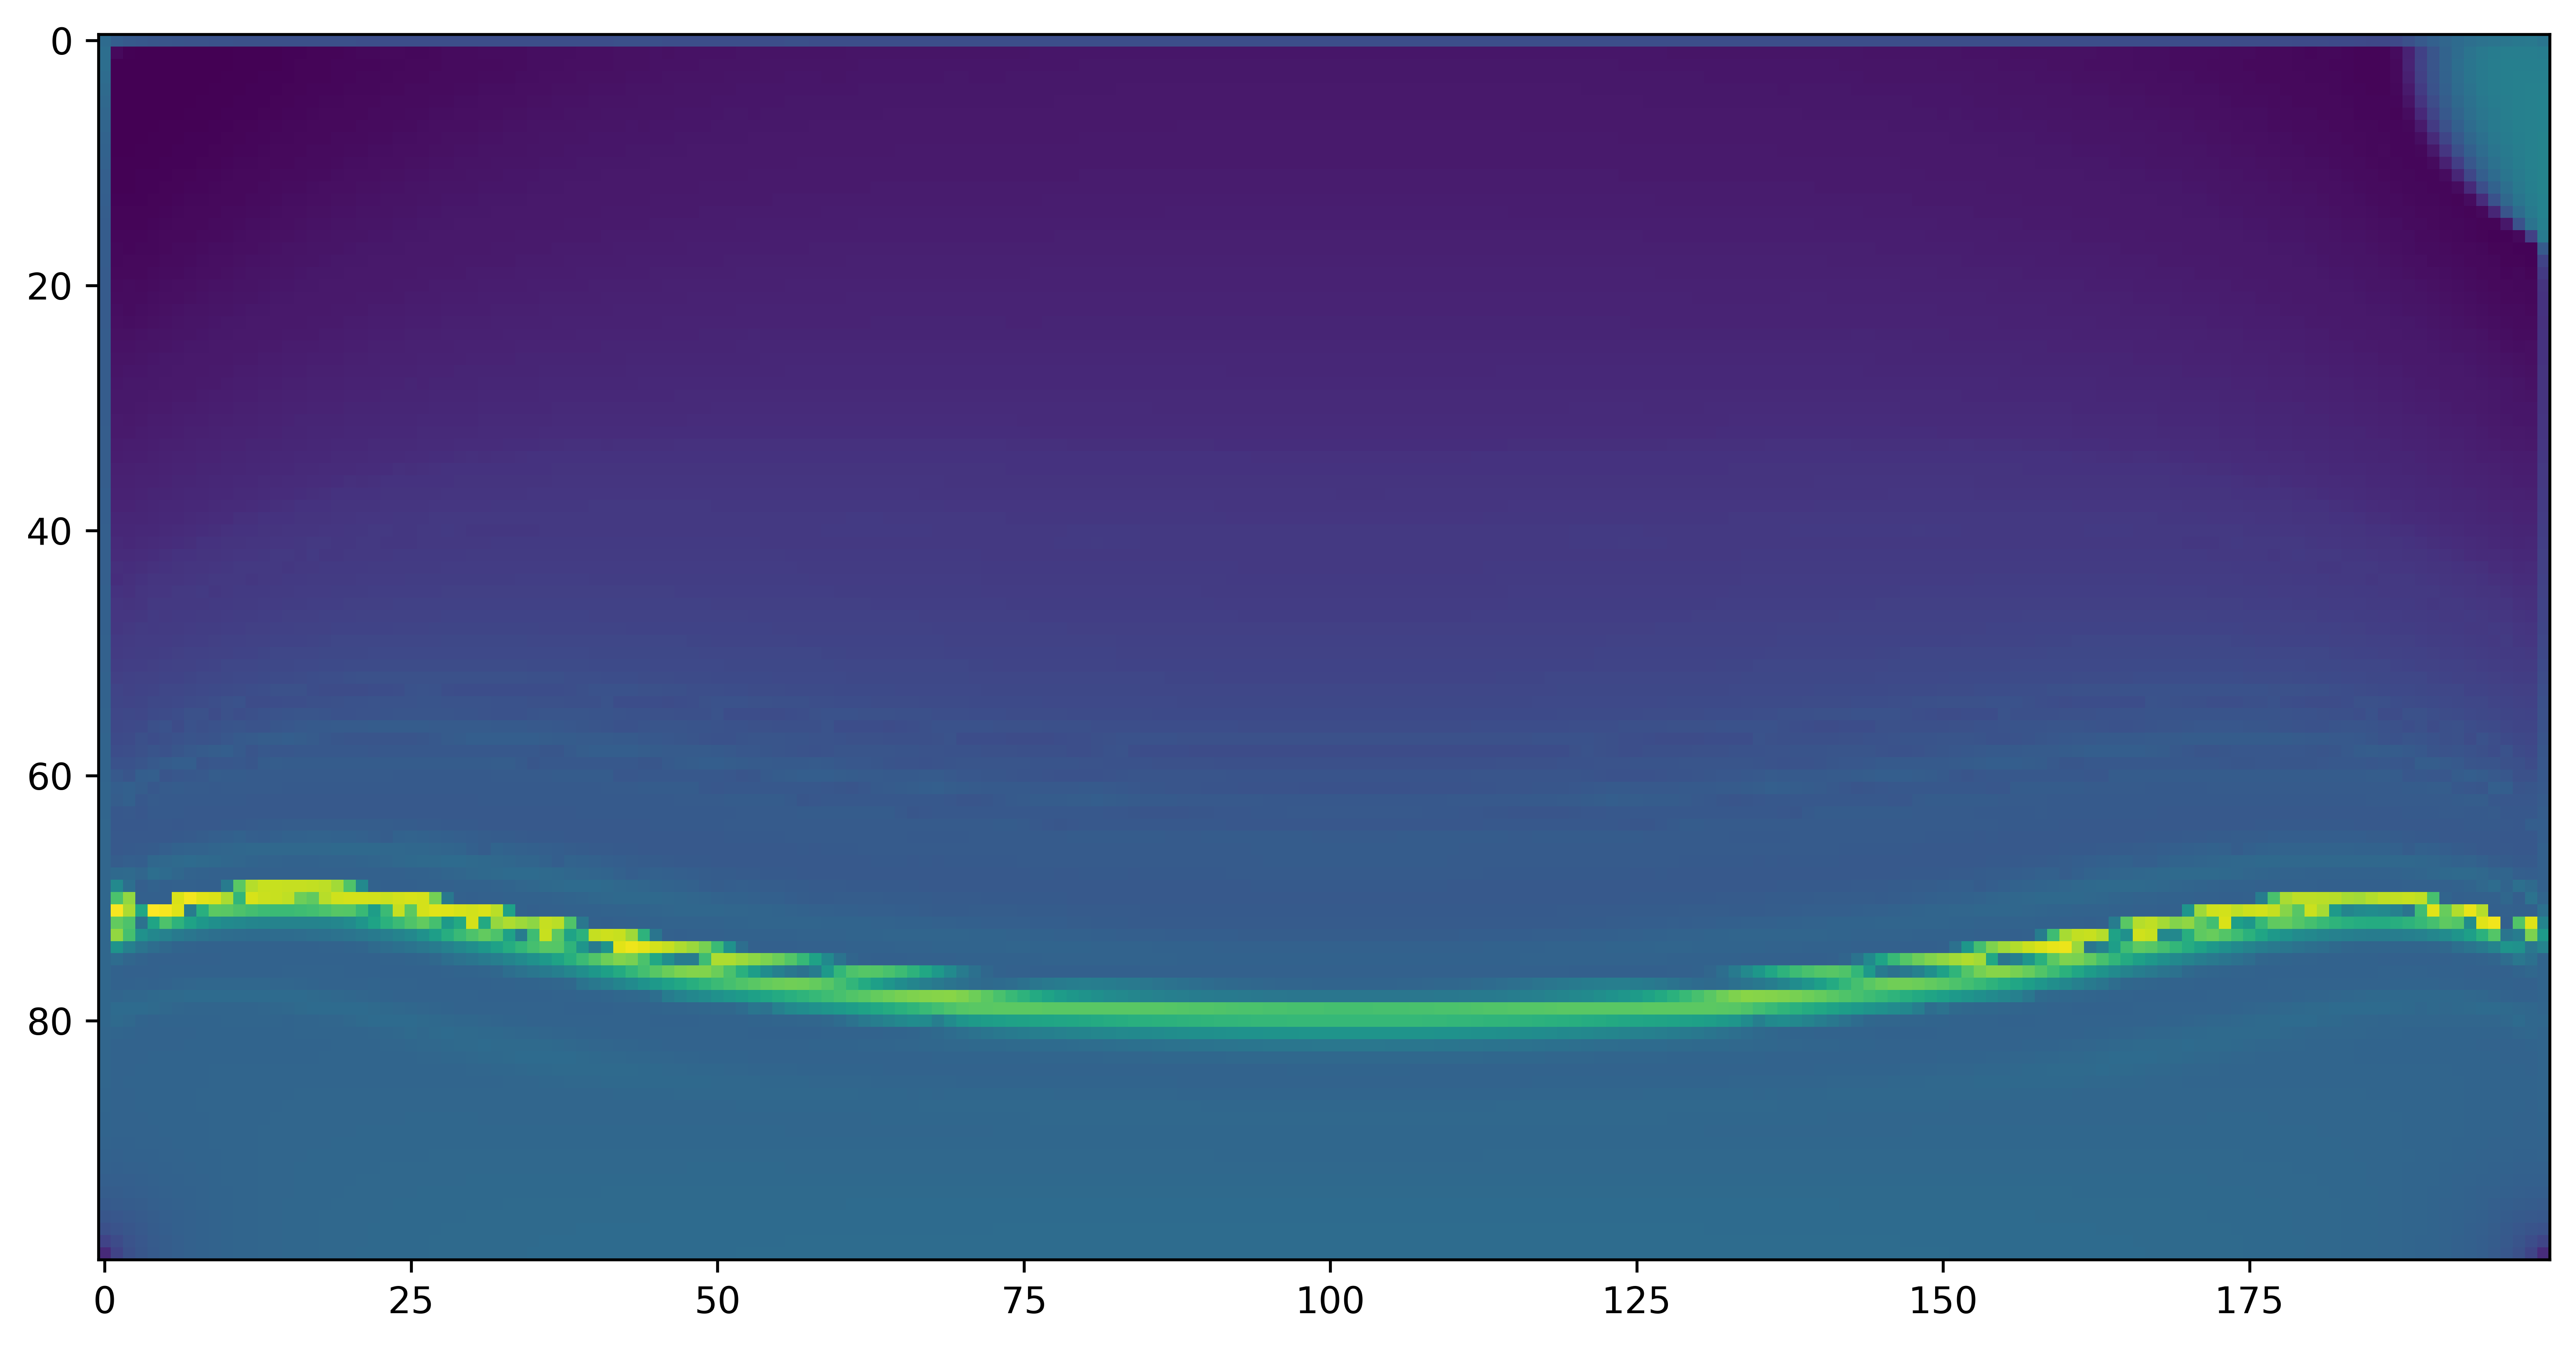

In [13]:
n=0
out = x[10,:,:,n]#.cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()



In [14]:
len(h5_files)

60

In [12]:
torch.max(x)

tensor(0.5282, dtype=torch.float64)

In [ ]:
tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
tags
torch.tensor(tags_small)

In [17]:
field_names = [
   # "Liquid X-Velocity [m_per_h]",
   # "Liquid Y-Velocity [m_per_h]",
    #"Liquid_Pressure [Pa]",
    #"Permeability_X [m^2]",
    #"Porosity",
    #"Temperature [C]",
    #"Total_CO2 [M]",
    #"Total_Cr(VI) [M]",
    #"Total_O2 [M]",
    #"Total_molasses [M]",
    "biomass [mol_m^3]",
    #"molasses_im [mol_m^3]"
]

In [19]:
h5_files

array(['../../../input_files/gaining_14_10_1xscale_1xresolution.h5',
       '../../../input_files/gaining_17_22_1xscale_1xresolution.h5',
       '../../../input_files/gaining_18_10_1xscale_1xresolution.h5',
       '../../../input_files/gaining_18_19_1xscale_1xresolution.h5',
       '../../../input_files/gaining_22_16_1xscale_1xresolution.h5',
       '../../../input_files/gaining_22_21_1xscale_1xresolution.h5',
       '../../../input_files/gaining_26_16_1xscale_1xresolution.h5',
       '../../../input_files/gaining_27_7_1xscale_1xresolution.h5',
       '../../../input_files/gaining_30_15_1xscale_1xresolution.h5',
       '../../../input_files/gaining_34_21_1xscale_1xresolution.h5',
       '../../../input_files/gaining_35_7_1xscale_1xresolution.h5',
       '../../../input_files/gaining_36_18_1xscale_1xresolution.h5',
       '../../../input_files/gaining_40_17_1xscale_1xresolution.h5',
       '../../../input_files/gaining_46_17_1xscale_1xresolution.h5',
       '../../../input_files/gaining

## Make dataaet/model to train on both 1x and 2x

In [1]:
import h5py
#import cv2
import os 
import numpy as np
import torch
import pandas as pd

base_dir = '../pt_files_biov3/'
f_dir = os.listdir(base_dir)
h5_files = []
# h5_files_train = []
h5_files2x = []
# Iterate over all files in the directory
for filename in f_dir:
    # if (filename.endswith(".pt")) & ((("2xresolution" in filename))):
    #     h5_files2x.append(base_dir+filename)
    # if (filename.endswith(".pt")) & ((("1xresolution" in filename))):
    #     h5_files.append(base_dir+filename)
    if (filename.endswith(".pt")) & ((("1x" in filename))):
        h5_files.append(base_dir+filename)
    if (filename.endswith(".pt")) & ((("10x" in filename))):
        h5_files2x.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    # if (filename.endswith(".pt")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        #h5_files.append(base_dir+filename)
# Run the processing in parallel


#h5_files = h5_files[0:6]
#h5_files_train = h5_files_train[0:6]
from torch.utils.data import Dataset

h5_files = np.sort(h5_files)
# h5_files_train=np.sort(h5_files_train)
h5_files2x=np.sort(h5_files2x)

num_time_steps = 114
num_features = 1  # As observed from the dataset

class CustomDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = torch.load(file1)
        high_scale = torch.load(file2)
        
        return low_scale, high_scale

from torch.utils.data import Dataset
import torch

class FullDataset_old(Dataset):
    def __init__(self, x_fname, x_fname2x, target_fname):
        # Load the data once here
        self.low_scale_data = torch.load(x_fname).float()
        self.twoX_scale_data = torch.load(x_fname2x).float()
        self.high_scale_data = [torch.load(f)[:,:,:,0].float() for f in target_fname]

    def __len__(self):
        return len(self.high_scale_data)

    def __getitem__(self, idx):
        low_scale = self.low_scale_data[idx]
        twoX_scale = self.twoX_scale_data[idx]
        high_scale = self.high_scale_data[idx]
        
        return low_scale, twoX_scale, high_scale

class FullDataset(Dataset):
    def __init__(self, x_fname,x_fname2, target_fname):
        self.x_fname = x_fname
        self.x_fname2 = x_fname2
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        file3 = self.x_fname2[idx]
        low_scale = torch.load(file1)[:,:,:,0].float()
        high_scale = torch.load(file2)[:,:,:,0].float()
        low_scale2 = torch.load(file3)[:,:,:,0].float()
        return low_scale, low_scale2, high_scale

class VelDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = torch.load(file1)[:,:,:,0].float()
        high_scale = torch.load(file2)[:,:,:,0].float()
        
        return low_scale, high_scale

In [2]:
# h5_train_full = np.concatenate([h5_files_train_1x, h5_files_train])
# h5_test_full = np.concatenate([h5_files, h5_files])


In [3]:
h5_files2x

array(['../pt_files_biov3/gaining_17_22_10xscale.pt',
       '../pt_files_biov3/gaining_22_16_10xscale.pt',
       '../pt_files_biov3/gaining_33_24_10xscale.pt',
       '../pt_files_biov3/gaining_34_6_10xscale.pt',
       '../pt_files_biov3/gaining_42_11_10xscale.pt',
       '../pt_files_biov3/gaining_49_10_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_14_10_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_18_10_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_27_7_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_30_15_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_31_7_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_34_15_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_41_12_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_57_8_10xscale.pt',
       '../pt_files_biov3/high_gaining_14_10_10xscale.pt',
       '../pt_files_biov3/high_gaining_24_17_10xscale.pt',
       '../pt_files_biov3/high_gaining_27_14_10xsc

In [4]:
# arr = h5_files
# contains_hanford = np.array(['hanford' in item for item in arr])

# # Alphabetical sorting key
# alphabetical_order = np.argsort(arr)

# # Prioritize "hanford" and then sort alphabetically within each group
# sorted_indices = np.lexsort((alphabetical_order, ~contains_hanford))

# # Use sorted indices to reorder the array
# sorted_arr = arr[sorted_indices]
# sorted_arr

In [5]:
len(h5_files2x)

69

In [6]:
# sorted_arr2 = h5_files_train[sorted_indices]
# xtest = sorted_arr2[0:36]
xtrain = np.concatenate([h5_files[0::5],h5_files[1::5], h5_files[2::5], h5_files[3::5]])
xtest = h5_files[4::5]
xtrain

array(['../pt_files_biov3/gaining_17_22_1xscale.pt',
       '../pt_files_biov3/gaining_49_10_1xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_31_7_1xscale.pt',
       '../pt_files_biov3/high_gaining_24_17_1xscale.pt',
       '../pt_files_biov3/high_gaining_35_7_1xscale.pt',
       '../pt_files_biov3/high_gaining_45_9_1xscale.pt',
       '../pt_files_biov3/high_gaining_right_35_23_1xscale.pt',
       '../pt_files_biov3/high_gaining_right_46_10_1xscale.pt',
       '../pt_files_biov3/high_hanford_gain_24_17_1xscale.pt',
       '../pt_files_biov3/high_hanford_gain_38_16_1xscale.pt',
       '../pt_files_biov3/high_losing_22_21_1xscale.pt',
       '../pt_files_biov3/high_losing_34_21_1xscale.pt',
       '../pt_files_biov3/high_losing_40_20_1xscale.pt',
       '../pt_files_biov3/high_losing_49_19_1xscale.pt',
       '../pt_files_biov3/gaining_22_16_1xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_14_10_1xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_34_15_1xscale.pt',

In [7]:
ytrain = np.concatenate([h5_files2x[0::5],h5_files2x[1::5], h5_files2x[2::5], h5_files2x[3::5]])
ytest = h5_files2x[4::5]
ytrain

array(['../pt_files_biov3/gaining_17_22_10xscale.pt',
       '../pt_files_biov3/gaining_49_10_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_31_7_10xscale.pt',
       '../pt_files_biov3/high_gaining_24_17_10xscale.pt',
       '../pt_files_biov3/high_gaining_35_7_10xscale.pt',
       '../pt_files_biov3/high_gaining_45_9_10xscale.pt',
       '../pt_files_biov3/high_gaining_right_35_23_10xscale.pt',
       '../pt_files_biov3/high_gaining_right_46_10_10xscale.pt',
       '../pt_files_biov3/high_hanford_gain_24_17_10xscale.pt',
       '../pt_files_biov3/high_hanford_gain_38_16_10xscale.pt',
       '../pt_files_biov3/high_losing_22_21_10xscale.pt',
       '../pt_files_biov3/high_losing_34_21_10xscale.pt',
       '../pt_files_biov3/high_losing_40_20_10xscale.pt',
       '../pt_files_biov3/high_losing_49_19_10xscale.pt',
       '../pt_files_biov3/gaining_22_16_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_14_10_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_34

In [8]:
xtest

array(['../pt_files_biov3/gaining_42_11_1xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_30_15_1xscale.pt',
       '../pt_files_biov3/high_gaining_14_10_1xscale.pt',
       '../pt_files_biov3/high_gaining_34_21_1xscale.pt',
       '../pt_files_biov3/high_gaining_41_20_1xscale.pt',
       '../pt_files_biov3/high_gaining_right_34_6_1xscale.pt',
       '../pt_files_biov3/high_gaining_right_41_12_1xscale.pt',
       '../pt_files_biov3/high_hanford_gain_18_10_1xscale.pt',
       '../pt_files_biov3/high_hanford_gain_37_9_1xscale.pt',
       '../pt_files_biov3/high_losing_22_16_1xscale.pt',
       '../pt_files_biov3/high_losing_34_15_1xscale.pt',
       '../pt_files_biov3/high_losing_39_13_1xscale.pt',
       '../pt_files_biov3/high_losing_47_9_1xscale.pt'], dtype='<U53')

In [9]:
ytest

array(['../pt_files_biov3/gaining_42_11_10xscale.pt',
       '../pt_files_biov3/hanford_diff_lose_30_15_10xscale.pt',
       '../pt_files_biov3/high_gaining_14_10_10xscale.pt',
       '../pt_files_biov3/high_gaining_34_21_10xscale.pt',
       '../pt_files_biov3/high_gaining_41_20_10xscale.pt',
       '../pt_files_biov3/high_gaining_right_34_6_10xscale.pt',
       '../pt_files_biov3/high_gaining_right_41_12_10xscale.pt',
       '../pt_files_biov3/high_hanford_gain_18_10_10xscale.pt',
       '../pt_files_biov3/high_hanford_gain_37_9_10xscale.pt',
       '../pt_files_biov3/high_losing_22_16_10xscale.pt',
       '../pt_files_biov3/high_losing_34_15_10xscale.pt',
       '../pt_files_biov3/high_losing_39_13_10xscale.pt',
       '../pt_files_biov3/high_losing_47_9_10xscale.pt'], dtype='<U54')

In [10]:
len(xtrain)

56

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

#xtrain = ([h5_files_train[i] for i in range(len(h5_files_train)) if i%5])
#ytrain = ([h5_files[i] for i in range(len(h5_files)) if  i%5])

import random
#indices = list(range(len(h5_files)))

# Shuffle the indices
#random.shuffle(indices)

# Reorder both lists according to the shuffled indices
#h5_files = [h5_files[i] for i in indices]
#h5_files_train = [h5_files_train[i] for i in indices]
#xtest = np.concatenate([h5_files_train[43:47], h5_files_train[16:26]])
#xtest2 = np.concatenate([h5_files_train_1x[43:47], h5_files_train_1x[16:26]])
#ytest = np.concatenate([h5_files[43:47], h5_files[16:26]])

#xtrain = np.concatenate([h5_files_train[0:16], h5_files_train[26:43],h5_files_train[47:]])
#xtrain2 = np.concatenate([h5_files_train_1x[0:16], h5_files_train_1x[26:43],h5_files_train_1x[47:]])
#ytrain = np.concatenate([h5_files[0:16], h5_files[26:43],h5_files[47:]])
ytrain
dataset = VelDataset(xtrain,ytrain)
dataloader = DataLoader(dataset, batch_size=6, shuffle=True,  num_workers=0, drop_last=False)
x,y = next(iter(dataloader))
x.shape


C:\Users\marcb\AppData\Local\Temp\ipykernel_3036\1011785623.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  low_scale = torch.load(file1)[:,:,:,0].float()
C:\Users\mar

torch.Size([6, 114, 100, 200])

In [27]:
xtrain[0]

'../pt_files_biov3/gaining_17_22_1xscale.pt'

In [13]:




# z.shape

In [14]:
# save_dataset = VelDataset(h5_files_train,h5_files)
# save_dataloader = DataLoader(save_dataset, batch_size=4, shuffle=False,  num_workers=4, drop_last=False)


In [15]:
# file_1x = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/full_1x.pt'
# file_2x = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/code/full_2x.pt'

In [12]:
#import torch
#import torch.nn as nn
#import torch.optim as optim
#from torch.utils.data import DataLoader
#import torch.nn.functional as F
#from torch.utils.data import Dataset, DataLoader
#full_dataset = FullDataset(file_1x,file_2x, h5_files)
#full_dataloader = DataLoader(full_dataset, batch_size=2, shuffle=False,  num_workers=0, drop_last=False)
#x1,x2,y = next(iter(full_dataloader))
#x1.shape
for x,y in dataloader:
    print(x.shape)

C:\Users\marcb\AppData\Local\Temp\ipykernel_21220\423545450.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  low_scale = torch.load(file1)[:,:,:,0].float()
C:\Users\mar

torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([7, 114, 100, 200])
torch.Size([1, 114, 100, 200])


In [17]:
# len(dataloader)
# len(xtrain)
# x2,y = next(iter(dataloader))
# x2.shape

In [18]:
# import matplotlib.pyplot as plt
# #plt.figure(figsize=(10, 20))
# #x,y = next(iter(dataloader))
# count=0
# for x, y in dataloader:
#     for i in range(x.shape[0]):
#         print (xtrain[i+count*10])
#         plt.imshow(x[i, 40, :, :])
#         plt.show()
#         plt.imshow(y[i, 40, :, :])
#         plt.show()
#     count = count+1

In [19]:
# import matplotlib.pyplot as plt
# #plt.figure(figsize=(10, 20))
# #x,y = next(iter(dataloader))
# count=0
# for x, y in dataloader:
#     for i in range(x.shape[0]):
#         print (xtest[i+count*10])
#         plt.imshow(x[i, 113, :, :])
#         plt.show()
#         plt.imshow(y[i, 113, :, :])
#         plt.show()
#     count = count+1

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class DoubleConv_down(nn.Module):
    
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size=1, padding=0),
            #nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0),
            #nn.BatchNorm2d(200),
            nn.ReLU(inplace=True),
            #nn.Conv2d(200, out_channels, kernel_size=3, padding=1),
            #nn.BatchNorm2d(out_channels),
            #nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class DoubleConv_up(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, 600, kernel_size=1, padding=0),
            #nn.BatchNorm2d(600),
            nn.ReLU(inplace=True),
            nn.Conv2d(600, 800, kernel_size=1, padding=0),
            #nn.BatchNorm2d(800),
            nn.ReLU(inplace=True),
            nn.Conv2d(800, out_channels, kernel_size=1, padding=0),
            #nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        #self.inc = DoubleConv_down(400, 256)
        self.up = DoubleConv_up(400, 1200)
        # Add more layers and upsampling layers to complete the U-Net structure

        #self.outc = nn.Conv2d(1200, 2000, kernel_size=1)

    def forward(self, x):
        x = x[0,:,:,:,:].permute(0,2,1,3)
        #x = self.inc(x)
        x = self.up(x)
        # Implement forward pass with upsampling and concatenations
        logits = self.outc(x)
        return logits


#class CustomDataset(Dataset):
#    def __init__(self, x, target):
#        """
#        Args:
#            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
#        """
#        self.x = torch.tensor(x, dtype=torch.float32)
#        self.target = torch.tensor(target, dtype=torch.float32)#

#    def __len__(self):
#        return len(self.x)

 #   def __getitem__(self, idx):
 #       input = self.x[idx]
 #       target = self.target[idx]
 #       return input, target

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChannelAttention(nn.Module):
    def __init__(self, num_channels, reduction_ratio=4):
        """
        Initializes the ChannelAttention module.
        
        :param num_channels: Number of input channels.
        :param reduction_ratio: Reduction ratio for the hidden layer in MLP.
        """
        super(ChannelAttention, self).__init__()
        self.num_channels = num_channels
        self.reduction_ratio = reduction_ratio

        # Define the MLP layers
        self.mlp = nn.Sequential(
            nn.Linear(num_channels, num_channels // reduction_ratio),
            nn.ReLU(),
            nn.Linear(num_channels // reduction_ratio, num_channels)
        )

    def forward(self, x):
        """
        Forward pass of the ChannelAttention module.
        
        :param x: Input tensor of shape (batch_size, num_channels, height, width).
        :return: Output tensor after applying channel attention.
        """
        # Global average pooling
        avg_pool = F.adaptive_avg_pool2d(x, (1, 1))
        avg_pool = avg_pool.view(avg_pool.shape[0], -1)

        # Channel attention
        attention = self.mlp(avg_pool)
        attention = torch.sigmoid(attention).view(attention.shape[0], attention.shape[1], 1, 1)

        # Scale the input by attention scores
        return x * attention

# Example of using the ChannelAttention module
# Assuming an input with 64 channels
#channel_att = ChannelAttention(num_channels=64)
#channel_att
### Import necessary packages
from torch import nn

### Squeeze and Excitation Class definition
class SE(nn.Module):
    def __init__(self, channel, reduction_ratio =2):
        super(SE, self).__init__()
        ### Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d(1)
        
        ### Fully Connected Multi-Layer Perceptron (FC-MLP)
        self.mlp = nn.Sequential(
            nn.Linear(channel, channel // reduction_ratio, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction_ratio, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.gap(x).view(b, c)
        y = self.mlp(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

In [12]:
# x.permute(0,1,3,2).permute(0,3,2,1).permute(0,3,1,2).shape

In [13]:
# c = nn.Linear(400,6)
# x2 = F.softmax(c(x), dim=2)
# x2.shape

In [14]:
# outputs.shape

In [15]:
class UNet30(nn.Module):
    def __init__(self, inc, outc):
        super(UNet30, self).__init__()
        
        
        #self.fc1 = nn.Linear(2,1)
        #self.d1 = nn.Dropout(.6, inplace=True)
        self.fc2 = nn.Linear(8000,4000)
        #self.d2 = nn.Dropout(.4, inplace=True)
        self.fc3 = nn.Linear(4000,3000)
        self.fc4 = nn.Linear(3000,2000)
        self.fc5 = nn.Linear(2000,2000)
        #self.fc6 = nn.Linear(2000,2000)
        
    def forward(self, x):
        x = x.repeat_interleave(40, dim=3)
       # x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = x.squeeze()
        x = F.selu(self.fc2(x))
        #x = self.d2(x)
        x = F.selu(self.fc3(x))
       # x = F.gelu(self.fc4(x))
        x = F.selu(self.fc4(x))
        x = self.fc5(x)
        return x

class UNet3(nn.Module):
    def __init__(self, inc, outc):
        super(UNet3, self).__init__()
        
        # self.d1 = nn.Dropout(.6, inplace=True)
        # self.d2 = nn.Dropout(.4, inplace=True)
        # self.d3 = nn.Dropout(.2, inplace=True)
        # self.d4 = nn.Dropout(.2, inplace=True)
        self.fc1 = nn.Linear(400,400)
        self.fc2 = nn.Linear(200,200)
        self.fc2_2 = nn.Linear(200,200)
        self.fc3 = nn.Linear(400,400)
        self.fc4 = nn.Linear(400,400)
        # self.fc5 = nn.Linear(3200,1000)
        self.fc6 = nn.Linear(400,400)
        
    def forward(self, x):
        #mult_dim = 4000//x.shape[3]
        x = x.repeat_interleave(2, dim=3)
        x = x.repeat_interleave(2, dim=2)
        x = F.gelu(self.fc1(x))
        # x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.gelu(self.fc2(x))
        x = F.gelu(self.fc2_2(x))
        # x = self.d3(x)
        x = x.permute(0,1,3,2)
        #x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = x.squeeze()
       #x = F.gelu(self.fc2(x))
        #x = self.d2(x)
        x = F.gelu(self.fc3(x))
        # #x = self.d3(x)
        x = F.gelu(self.fc4(x))
        #x = x*x0
        # x = F.gelu(self.fc5(x))
        # x = self.d4(x)
        x = self.fc6(x)
        #x = torch.reshape(x,[43,200,400])
        return x

class UNet4(nn.Module):
    def __init__(self, inc, outc):
        super(UNet4, self).__init__()
        
        # self.d1 = nn.Dropout(.6, inplace=True)
        # self.d2 = nn.Dropout(.4, inplace=True)
        # self.d3 = nn.Dropout(.2, inplace=True)
        # self.d4 = nn.Dropout(.2, inplace=True)
        self.fc1 = nn.Linear(800,600)
        self.fc2 = nn.Linear(400,300)
        self.fc2_2 = nn.Linear(300,200)
        self.fc3 = nn.Linear(600,500)
        self.fc4 = nn.Linear(500,400)
        # self.fc5 = nn.Linear(3200,1000)
        self.fc6 = nn.Linear(400,400)
        
    def forward(self, x):
        #mult_dim = 4000//x.shape[3]
        x = x.repeat_interleave(4, dim=3)
        x = x.repeat_interleave(4, dim=2)
        x = F.silu(self.fc1(x))
        # x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.silu(self.fc2(x))
        x = F.silu(self.fc2_2(x))
        # x = self.d3(x)
        x = x.permute(0,1,3,2)
        #x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = x.squeeze()
       #x = F.silu(self.fc2(x))
        #x = self.d2(x)
        x = F.silu(self.fc3(x))
        # #x = self.d3(x)
        x = F.silu(self.fc4(x))
        #x = x*x0
        # x = F.gelu(self.fc5(x))
        # x = self.d4(x)
        x = self.fc6(x)
        #x = torch.reshape(x,[43,200,400])
        return x


class UNet42(nn.Module):
    def __init__(self, inc, outc):
        super(UNet42, self).__init__()
        
        # self.d1 = nn.Dropout(.6, inplace=True)
        # self.d2 = nn.Dropout(.4, inplace=True)
        # self.d3 = nn.Dropout(.2, inplace=True)
        # self.d4 = nn.Dropout(.2, inplace=True)
        self.fc1 = nn.Linear(1600,1200)
        self.fc2 = nn.Linear(800,400)
        self.fc2_2 = nn.Linear(400,200)
        self.fc2_3 = nn.Linear(200,200)
        self.fc3 = nn.Linear(1200,800)
        self.fc4 = nn.Linear(800,400)
        # self.fc5 = nn.Linear(3200,1000)
        self.fc6 = nn.Linear(400,400)
        
    def forward(self, x):
        #mult_dim = 4000//x.shape[3]
        x = x.repeat_interleave(8, dim=3)
        x = x.repeat_interleave(8, dim=2)
        x = F.silu(self.fc1(x))
        # x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.silu(self.fc2(x))
        x = F.silu(self.fc2_2(x))
        x = F.silu(self.fc2_3(x))
        # x = self.d3(x)
        x = x.permute(0,1,3,2)
        #x = F.gelu(self.fc1(x))
        #x = self.d1(x)
        #x = x.squeeze()
       #x = F.silu(self.fc2(x))
        #x = self.d2(x)
        x = F.silu(self.fc3(x))
        # #x = self.d3(x)
        x = F.silu(self.fc4(x))
        #x = x*x0
        # x = F.gelu(self.fc5(x))
        # x = self.d4(x)
        x = self.fc6(x)
        #x = torch.reshape(x,[43,200,400])
        return x


In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpatiotemporalAttentionModule(nn.Module):
    def __init__(self, T, H, W):
        super(SpatiotemporalAttentionModule, self).__init__()
        # Temporal Attention
        self.temporal_pool = nn.MaxPool3d((1,H,W))  # Pool over H and W
        self.temporal_fc = nn.Sequential(
            nn.Linear(T, T//2),
            nn.SiLU(),
            nn.Linear(T//2, T),
            nn.Sigmoid()
            
        )
        # Spatial Attention
        self.spatial_pool = nn.MaxPool3d((T,1,1))  # Pool over T
        self.spatial_conv = nn.Sequential(
            #nn.Linear(W,W),
            nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=True),
            nn.Sigmoid()
        )

        self.spatial_pool2 = nn.AdaptiveAvgPool3d((1, H, 1))  # Pool over T
        self.spatial_conv2 = nn.Sequential(
            nn.Linear(H,H),
            #nn.Conv2d(10, 1, kernel_size=3, padding=1, bias=True),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        batch_size, T, H, W = x.size()

        x_temporal = self.temporal_pool(x)  # [batch_size, T, 1, 1]
        x_temporal = x_temporal.squeeze()#view(batch_size, T)
        x_temporal = self.temporal_fc(x_temporal)  # [batch_size, T]
        x_temporal = x_temporal.view(batch_size, T, 1, 1)
        x = x * x_temporal  # Apply temporal attention

         # Spatial Attention
        x_spatial = self.spatial_pool(x)  # [batch_size, 1, H, W]
        x_spatial = self.spatial_conv(x_spatial)  # [batch_size, 1, H, W]
        x = x * x_spatial#.unsqueeze(1)  # Apply spatial attention

        # x_spatial = self.spatial_pool2(x)  # [batch_size, 1, H, W]
        # x_spatial = x_spatial.squeeze(3)  # Remove T dimension
        # x_spatial = self.spatial_conv2(x_spatial)  # [batch_size, 1, H, W]
        # x = x * x_spatial.unsqueeze(3)
        
        return x

class UNet3_Attention(nn.Module):
    def __init__(self):
        super(UNet3_Attention, self).__init__()
        self.attention = SpatiotemporalAttentionModule(T=114, H=100, W=200)
        self.attention2 = SpatiotemporalAttentionModule(T=114, H=100, W=2000)
        self.fc1 = nn.Linear(200, 2000)
       # self.fc2 = nn.Linear(1000, 2000)
       # self.d0 = nn.Dropout(.1)
        self.fc3 = nn.Linear(2000, 8000)
        self.d1 = nn.Dropout(.3)
        #self.fc3_2 = nn.Linear(4000, 4000)
       # self.d2 = nn.Dropout(.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
        #self.fc6 = nn.Linear(2000, 2000)
            
    def forward(self, x):
        
        # print(x.shape)
        #x = x.repeat_interleave(40, dim=3)
       # x = x.view(x.size(0), -1)  # Flatten
        x = F.silu(self.attention(x))
        x = F.silu(self.fc1(x))
        #x = F.silu(self.attention2(x))
       # x = self.d0(x)
       # x = F.silu(self.fc2(x))
        
        x = F.silu(self.fc3(x))
        
        x = self.d1(x)
       # x = F.silu(self.fc3_2(x))
       # x = self.d2(x)
        x = F.silu(self.fc4(x))
        #x = F.silu(self.attention2(x))
       # x = F.gelu(self.fc5(x))
        x = self.fc5(x)
        return x


In [28]:
class trip_att(nn.Module):
    def __init__(self):
        super(trip_att, self).__init__()
        # self.transform = transformer_att()
        self.m1=nn.Sequential(
                    nn.Conv2d(114, 20, kernel_size=5, padding=2),
                    nn.SiLU(),
                    nn.Dropout(.1),
                    nn.Conv2d(20, 1, kernel_size=1, padding=0),
                    nn.SiLU(),
                    nn.Linear(2000,1),
                    nn.Sigmoid(),
                )
        self.m2=nn.Sequential(
                    nn.Conv2d(2000, 100, kernel_size=5, padding=2),
                    nn.SiLU(),
                    nn.Dropout(.1),
                    nn.Conv2d(100, 1, kernel_size=1, padding=0),
                    nn.SiLU(),
                    nn.Linear(114,1),
                    nn.Sigmoid(),
                )
        self.sigmoid=nn.Sigmoid()
        self.m3=nn.Sequential(
                    nn.Conv2d(100, 10, kernel_size=5, padding=2),
                    nn.SiLU(),
                    nn.Conv2d(10, 1, kernel_size=1, padding=0),
                    nn.SiLU(),
                    nn.Linear(114,1),
                    nn.Sigmoid(),
                )

                
    def forward(self, x):
        x1 = self.m1(x)
        x2 = x.permute(0,3,2,1)
        x3 = x.permute(0,2,3,1)
        x2 = self.m2(x2)
        x3 = self.m3(x3)
        x1=x*x1
        x2=x*x2.permute(0,3,2,1)
        x3=x*x3.permute(0,3,1,2)
        x = (x1+x2+x3)/3  
        #x = (x+x1/4)
        #x = (x-torch.min(x))/(torch.max(x)-torch.min(x))
        #x = self.sigmoid(x)
        return x

class UNet3_attention(nn.Module):
    def __init__(self):
        super(UNet3_attention, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        x = F.silu(self.fc1(x))
        x = F.silu(self.attention(x))
        x = self.dropout(x)
       
        x = F.silu(self.fc3(x))
        
        x = F.silu(self.fc4(x))
        x = self.fc5(x)
        return x

In [16]:
len(ytest)

13

In [17]:
#xtest = ([h5_files_train[i] for i in range(len(h5_files_train)) if not i%5])
#ytest = ([h5_files[i] for i in range(len(h5_files)) if  not i%5])

test_dataset = VelDataset(xtest,ytest)
test_dataloader = DataLoader(test_dataset, batch_size=5, shuffle=False, drop_last=False, num_workers=0)
#model1.to(device)
#model1
len(ytest)

13

In [65]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = UNet3_Attention().to(device)
#model1 = model1.to(torch.float16)

#model2 = UNet2(400, 800).to(device)

#model3 = UNet2(800, 1200).to(device)


#model4 = UNet2(1200, 1600).to(device)

#model5 = UNet2(1600, 2000).to(device)
import gc
torch.cuda.empty_cache()
gc.collect()
model1

UNet3_Attention(
  (attention): SpatiotemporalAttentionModule(
    (temporal_pool): MaxPool3d(kernel_size=(1, 100, 200), stride=(1, 100, 200), padding=0, dilation=1, ceil_mode=False)
    (temporal_fc): Sequential(
      (0): Linear(in_features=114, out_features=57, bias=True)
      (1): SiLU()
      (2): Linear(in_features=57, out_features=114, bias=True)
      (3): Sigmoid()
    )
    (spatial_pool): MaxPool3d(kernel_size=(114, 1, 1), stride=(114, 1, 1), padding=0, dilation=1, ceil_mode=False)
    (spatial_conv): Sequential(
      (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Sigmoid()
    )
    (spatial_pool2): AdaptiveAvgPool3d(output_size=(1, 100, 1))
    (spatial_conv2): Sequential(
      (0): Linear(in_features=100, out_features=100, bias=True)
      (1): Sigmoid()
    )
  )
  (attention2): SpatiotemporalAttentionModule(
    (temporal_pool): MaxPool3d(kernel_size=(1, 100, 2000), stride=(1, 100, 2000), padding=0, dilation=1, ceil_mode=False)
    (

In [30]:
# from torchmetrics import MeanSquaredLogError
# MSLE = MeanSquaredLogError().to(device)
# MSLE(outputs,labels)

In [31]:
# plt.plot(torch.mean(labels, dim=(2,3)).cpu().detach().numpy()[0])
# torch.mean(labels, dim=(2,3)).cpu().detach().numpy()[0]

In [32]:
# pool = nn.AvgPool2d( kernel_size=(1,4))
# pool(inputs).shape

In [33]:
# inputs.shape

In [34]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [60]:
#!pip install torchmetrics
inpr = torch.rand([4,114,100,200])
nn.MaxPool3d((114,1,1))(inpr).shape

torch.Size([4, 1, 100, 200])

In [33]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR
import gc
import csv
import numpy as np
from torchmetrics.regression import MeanAbsolutePercentageError
from sklearn.metrics import r2_score
import warnings
import hydroeval as he
import warnings
warnings.filterwarnings("ignore")

# warnings.filterwarnings("ignore", category=UserWarning)  # Suppress any sklearn warnings

# Function to compute Nash-Sutcliffe Efficiency
def compute_nse(observed, simulated):
    observed = np.array(observed)
    simulated = np.array(simulated)
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - np.mean(observed)) ** 2)
    # Handle division by zero
    if denominator == 0:
        return np.nan
    return 1 - numerator / denominator

# Initialize lists to store final scores
final_mses_noatt2 = []
final_mapes_noatt2 = []
final_r2_noatt2 = []
final_nse_noatt2 = []

# Loop over multiple runs
for m in range(1,20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # model1 = ConvLSTMUNet_upscaled().to(device)
    model1 = UNet3_attention().to(device)
    torch.cuda.empty_cache()
    gc.collect()
    criterion1 = nn.HuberLoss()
    criterion2 = nn.MSELoss()
    criterion4 = nn.L1Loss()
    criterion3 = MeanAbsolutePercentageError().to(device)
    optimizer1 = optim.AdamW(model1.parameters(), lr=0.00012, weight_decay=.04)
    
    gamma = 0.9890
    scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
    torch.cuda.empty_cache()
    gc.collect()

    # Training loop
    num_epochs = 20
    for epoch in range(num_epochs):
        model1.train()
        count = 0
        running_loss = 0
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            optimizer1.zero_grad()
            outputs = model1(inputs)
            loss = criterion2(outputs, labels)+.5*criterion4(outputs, labels)
            loss.backward()
            optimizer1.step()
            scheduler1.step()
            count += 1
            running_loss += loss.item()
        torch.cuda.empty_cache()
        gc.collect()

        # Model testing
        model1.eval()
        nn_errors = []
        orig_errors = []
        nn_mapes = []
        orig_mapes = []
        nn_r2 = []
        orig_r2 = []
        nn_mae = []
        orig_mae = []

        with torch.no_grad():
            for inp, lab in test_dataloader:
                inp = inp.to(device)
                lab = lab.to(device)
                outp = model1(inp)
                outp = outp*765.37635
                #inp = inp*765.37635
                lab = lab*765.37635
                # inp = inp.squeeze()
                # lab = lab.squeeze()
                inp_upscaled = inp.repeat_interleave(10, dim=3)
                #inp_upscaled = inp_upscaled.repeat_interleave(2, dim=2)
                inp_upscaled = inp_upscaled*765.37635
                

                # Calculate MSE
                nn_error = criterion2( lab, outp)
                orig_error = criterion2( lab, inp_upscaled)
                nn_errors.append(nn_error.cpu().detach().numpy())
                orig_errors.append(orig_error.cpu().detach().numpy())

                # Calculate MAPE
                nn_mape = criterion3( lab, outp)
                orig_mape = criterion3( lab, inp_upscaled)
                nn_mapes.append(nn_mape.cpu().detach().numpy())
                orig_mapes.append(orig_mape.cpu().detach().numpy())

                nn_mae_value = criterion4( lab, outp)
                orig_mae_value = criterion4( lab, inp_upscaled)
                nn_mae.append(nn_mae_value.cpu().detach().numpy())
                orig_mae.append(orig_mae_value.cpu().detach().numpy())

                batch_size = outp.shape[0]
                for k in range(batch_size):
                    # Extract time series by averaging over spatial dimensions
                    out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
                    lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
                    inp_ts = inp_upscaled[k].mean(dim=(1, 2)).cpu().detach().numpy()

                    # For upscaled input, repeat to match the time steps if necessary
                    # if inp_ts.shape[0] != lab_ts.shape[0]:
                    #     # Assuming input and label have different time steps
                    #     # Adjust inp_ts to match lab_ts length
                    #     inp_ts = np.interp(
                    #         np.linspace(0, 1, lab_ts.shape[0]),
                    #         np.linspace(0, 1, inp_ts.shape[0]),
                    #         inp_ts
                    #     )

                    # Compute R²
                    nn_r2_value = r2_score(lab_ts, out_ts)
                    orig_r2_value = r2_score(lab_ts, inp_ts)
                    nn_r2.append(nn_r2_value)
                    orig_r2.append(orig_r2_value)

                    # Compute NSE
                    

        torch.cuda.empty_cache()
        gc.collect()
        current_lr = optimizer1.param_groups[0]['lr']
        avg_orig_error = np.mean(orig_errors)
        avg_nn_error = np.mean(nn_errors)
        avg_orig_mape = np.mean(orig_mapes)
        avg_nn_mape = np.mean(nn_mapes)
        avg_orig_r2 = np.median(orig_r2)
        avg_nn_r2 = np.median(nn_r2)
        avg_orig_mae = np.median(orig_mae)
        avg_nn_mae = np.median(nn_mae)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count:.5f}, Learning Rate: {current_lr:.8f}")
        print(f"Epoch {epoch+1}: Orig MSE: {avg_orig_error:.5f}, NN MSE: {avg_nn_error:.5f}, Orig MAPE: {avg_orig_mape:.5f}%, NN MAPE: {avg_nn_mape:.5f}%")
        print(f"Epoch {epoch+1}: Orig R²: {avg_orig_r2:.5f}, NN R²: {avg_nn_r2:.5f}, Orig MAE: {avg_orig_mae:.5f}, NN MAE: {avg_nn_mae:.5f}")

    # Save final scores
    final_mses_noatt2.append(avg_nn_error)
    final_mapes_noatt2.append(avg_nn_mape)
    final_r2_noatt2.append(avg_nn_r2)
    final_nse_noatt2.append(avg_nn_mae)
    print(f'Run {m+1}: Final MSE: {avg_nn_error:.5f}, Final MAPE: {avg_nn_mape:.5f}%, Final R²: {avg_nn_r2:.5f}, Final MAE: {avg_nn_mae:.5f}')

    # Save model state every 5 runs
    # if m % 5 == 0:
    torch.save(model1.state_dict(), f'attn_model_bio_10x_upscaling_{m}.pt')
    torch.cuda.empty_cache()
    gc.collect()

Epoch 1/20, Loss: 0.04876, Learning Rate: 0.00010743
Epoch 1: Orig MSE: 4089.47290, NN MSE: 5436.39404, Orig MAPE: 48.24824%, NN MAPE: 1.83398%
Epoch 1: Orig R²: 0.72713, NN R²: -0.53305, Orig MAE: 26.41704, NN MAE: 46.37284
Epoch 2/20, Loss: 0.02987, Learning Rate: 0.00009618
Epoch 2: Orig MSE: 4089.47290, NN MSE: 2395.86841, Orig MAPE: 48.24824%, NN MAPE: 2.59088%
Epoch 2: Orig R²: 0.72713, NN R²: 0.62339, Orig MAE: 26.41704, NN MAE: 27.11627
Epoch 3/20, Loss: 0.01956, Learning Rate: 0.00008611
Epoch 3: Orig MSE: 4089.47290, NN MSE: 2470.53320, Orig MAPE: 48.24824%, NN MAPE: 2.82427%
Epoch 3: Orig R²: 0.72713, NN R²: 0.64554, Orig MAE: 26.41704, NN MAE: 25.74602
Epoch 4/20, Loss: 0.01715, Learning Rate: 0.00007710
Epoch 4: Orig MSE: 4089.47290, NN MSE: 2519.65405, Orig MAPE: 48.24824%, NN MAPE: 0.96347%
Epoch 4: Orig R²: 0.72713, NN R²: 0.45986, Orig MAE: 26.41704, NN MAE: 22.80602
Epoch 5/20, Loss: 0.01554, Learning Rate: 0.00006902
Epoch 5: Orig MSE: 4089.47290, NN MSE: 2592.88403,

KeyboardInterrupt: 

In [31]:
model_weights_path = 'attn_model_bio_10x_upscaling_0.pt'
model1.load_state_dict(torch.load(model_weights_path))

<All keys matched successfully>

In [32]:
model1

UNet3_attention(
  (attention): trip_att(
    (m1): Sequential(
      (0): Conv2d(114, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(20, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): SiLU()
      (5): Linear(in_features=2000, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (m2): Sequential(
      (0): Conv2d(2000, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): Dropout(p=0.1, inplace=False)
      (3): Conv2d(100, 1, kernel_size=(1, 1), stride=(1, 1))
      (4): SiLU()
      (5): Linear(in_features=114, out_features=1, bias=True)
      (6): Sigmoid()
    )
    (sigmoid): Sigmoid()
    (m3): Sequential(
      (0): Conv2d(100, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): Conv2d(10, 1, kernel_size=(1, 1), stride=(1, 1))
      (3): SiLU()
      (4): Linear(in_features=114, out_features=1, bias=True)
      (5): Sigmoid(

In [82]:
np.mean(final_mses_noatt2)

0.0028356037

In [61]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR
# from torchmetrics import MeanSquaredLogError
import gc

# Model, loss, and optimizer
final_mses_noatt2=[]
for m in range(20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model1 = UNet3_Attention().to(device) 
    
    torch.cuda.empty_cache()
    gc.collect()
    criterion2 = nn.MSELoss()
    optimizer1 = optim.AdamW(model1.parameters(), lr=0.0006)
    
    gamma = .9960# 
    scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
    torch.cuda.empty_cache()
    gc.collect()
    #n=2
    # Training loop
    num_epochs = 16
    for epoch in range(num_epochs):
        model1.train()
        count=0
        running_loss=0
        for batch in dataloader:
        
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            optimizer1.zero_grad()
            outputs = model1(inputs)
            loss = criterion2(outputs, labels)
            loss.backward()
            optimizer1.step()
            scheduler1.step()
            count=count+1
            running_loss = running_loss+loss.item()
        torch.cuda.empty_cache()
        gc.collect()
        # Model testing
        model1.eval()
        nn_errors=[]
        orig_errors=[]
        with torch.no_grad():
            for inp, lab in test_dataloader:
                inp = inp.to(device)
                lab= lab.to(device)                
                outp = model1(inp)          
                inp = inp.repeat_interleave(10, dim=3)
                nn_error = criterion2(outp, lab)
                orig_error = criterion2(lab, inp)
                nn_errors.append(nn_error.cpu().detach().numpy())
                orig_errors.append(orig_error.cpu().detach().numpy())
        torch.cuda.empty_cache()
        gc.collect()
        print (np.mean(orig_errors), np.mean(nn_errors))
        current_lr = optimizer1.param_groups[0]['lr']
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")
    print('Final MSE: ', np.mean(nn_errors))
    final_mses_noatt2.append(np.mean(nn_errors))
    torch.save(model1.state_dict(),'attn_model_bio_10x_upscaling_'+str(m)) 
    torch.cuda.empty_cache()
    gc.collect()

C:\Users\marcb\AppData\Local\Temp\ipykernel_22080\423545450.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  low_scale = torch.load(file1)[:,:,:,0].float()
C:\Users\mar

0.0049117124 0.0033864393
Epoch 1/16, Loss: 0.010547356421334876, Learning Rate: 0.00057874
0.0049117124 0.0028145432
Epoch 2/16, Loss: 0.005164356255489919, Learning Rate: 0.00055824
0.0049117124 0.0029529417
Epoch 3/16, Loss: 0.004084341150398056, Learning Rate: 0.00053846
0.0049117124 0.0033131556
Epoch 4/16, Loss: 0.0035936469470875133, Learning Rate: 0.00051938
0.0049117124 0.0031304033
Epoch 5/16, Loss: 0.003593537878865997, Learning Rate: 0.00050098
0.0049117124 0.0026380217
Epoch 6/16, Loss: 0.0035435835274660755, Learning Rate: 0.00048323
0.0049117124 0.002673446
Epoch 7/16, Loss: 0.0032646990795102385, Learning Rate: 0.00046611
0.0049117124 0.0041635437
Epoch 8/16, Loss: 0.003849365127583345, Learning Rate: 0.00044960
0.0049117124 0.0024979324
Epoch 9/16, Loss: 0.0034543460028039086, Learning Rate: 0.00043367
0.0049117124 0.0029572467
Epoch 10/16, Loss: 0.003165589451479415, Learning Rate: 0.00041830
0.0049117124 0.0025343015
Epoch 11/16, Loss: 0.0032129877557357154, Learning

In [56]:
final_mses2 = np.concatenate([final_mses2.iloc[:,1], np.sort(final_mses_att2)])
final_mses2

array([0.00249811, 0.0025304 , 0.00255134, 0.00258547, 0.00259047,
       0.00263651, 0.00266514, 0.00269417, 0.00271953, 0.00272169,
       0.00277459, 0.00277513, 0.00284417, 0.00287499, 0.00296572,
       0.00297558, 0.00327387, 0.00345018, 0.00384249, 0.00403935,
       0.00250637, 0.00255497, 0.00255641, 0.00267108, 0.00268399,
       0.00271035, 0.00271838, 0.00273978, 0.00275599, 0.00282325,
       0.0028255 , 0.00286358, 0.00293215, 0.00293569, 0.00300053,
       0.0031007 , 0.00312719, 0.00314354, 0.00315595, 0.00347879])

In [63]:
final_mses = np.concatenate([final_mses.iloc[:,1], np.sort(final_mses_noatt2)])
final_mses

array([0.00258462, 0.00266109, 0.00267163, 0.00272126, 0.00274493,
       0.00276461, 0.00279445, 0.00282174, 0.0028454 , 0.00288503,
       0.00290678, 0.0031312 , 0.00330724, 0.00338993, 0.00360416,
       0.0036985 , 0.0037437 , 0.00375446, 0.00392897, 0.00435304,
       0.00252363, 0.00259132, 0.00259429, 0.00264992, 0.00267207,
       0.0027319 , 0.00278952, 0.00283204, 0.00285661, 0.00290205,
       0.00291513, 0.00293504, 0.0029933 , 0.00301861, 0.00330274,
       0.00340586, 0.00343912, 0.00348486, 0.00354197, 0.0039874 ])

In [45]:
final_mses2 = final_mses[:]
final_mses2

[0.0032738661,
 0.002844172,
 0.0027216894,
 0.0024981145,
 0.002590469,
 0.0026365116,
 0.0027195343,
 0.0038424877,
 0.004039352,
 0.0026651418,
 0.0027751315,
 0.0029657201,
 0.0028749947,
 0.0025513447,
 0.002774592,
 0.0025304046,
 0.0029755845,
 0.00345018,
 0.0025854658,
 0.0026941744]

In [64]:
from scipy.stats import ttest_ind
final_mses2=np.sort(final_mses2)
final_mses=np.sort(final_mses)

In [76]:
ttest_ind(final_mses2, final_mses)

TtestResult(statistic=-2.2454075918591374, pvalue=0.027573315788200024, df=78.0)

In [75]:
np.mean(final_mses2)

0.002882328421299057

In [73]:
pd.DataFrame(final_mses).to_csv('mse.csv')

In [62]:
final_mses = pd.read_csv('mse.csv')

In [28]:
save_dataset = VelDataset(h5_files_train,h5_files)
save_dataloader = DataLoader(save_dataset, batch_size=4, shuffle=False,  num_workers=4, drop_last=False)


model1.eval()
outputs=torch.zeros((len(h5_files),114,100,2000))
count=0               
with torch.no_grad():
    for inp, lab in save_dataloader:
        inp = inp.to(device)
        #lab= lab.to(device)
        
        outp = model1(inp)
        outputs[count:count+4,:,:,:] = outp
        count = count+4

In [41]:



torch.save(model1.state_dict(),'attn_model_bio_10x_upscaling') 

In [53]:
outp.shape
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

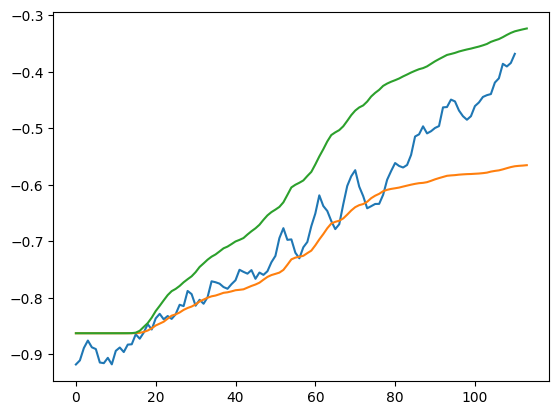

In [60]:
k=3
plt.plot(moving_average(outp.cpu().detach().numpy()[k], 4))
plt.plot(lab.cpu().detach().numpy()[k])
plt.plot(inp.cpu().detach().numpy()[k])

In [160]:
inputs.shape

torch.Size([8, 90, 100, 200])

In [238]:
torch.save(model1.state_dict(), 'resolution_model4_siluv2')

In [14]:
model_weights_path = 'weights_bio_overfit_big_fulltest_best_feb7'
model1.load_state_dict(torch.load(model_weights_path))

<All keys matched successfully>

In [34]:
import gc
torch.cuda.empty_cache()
gc.collect()

485

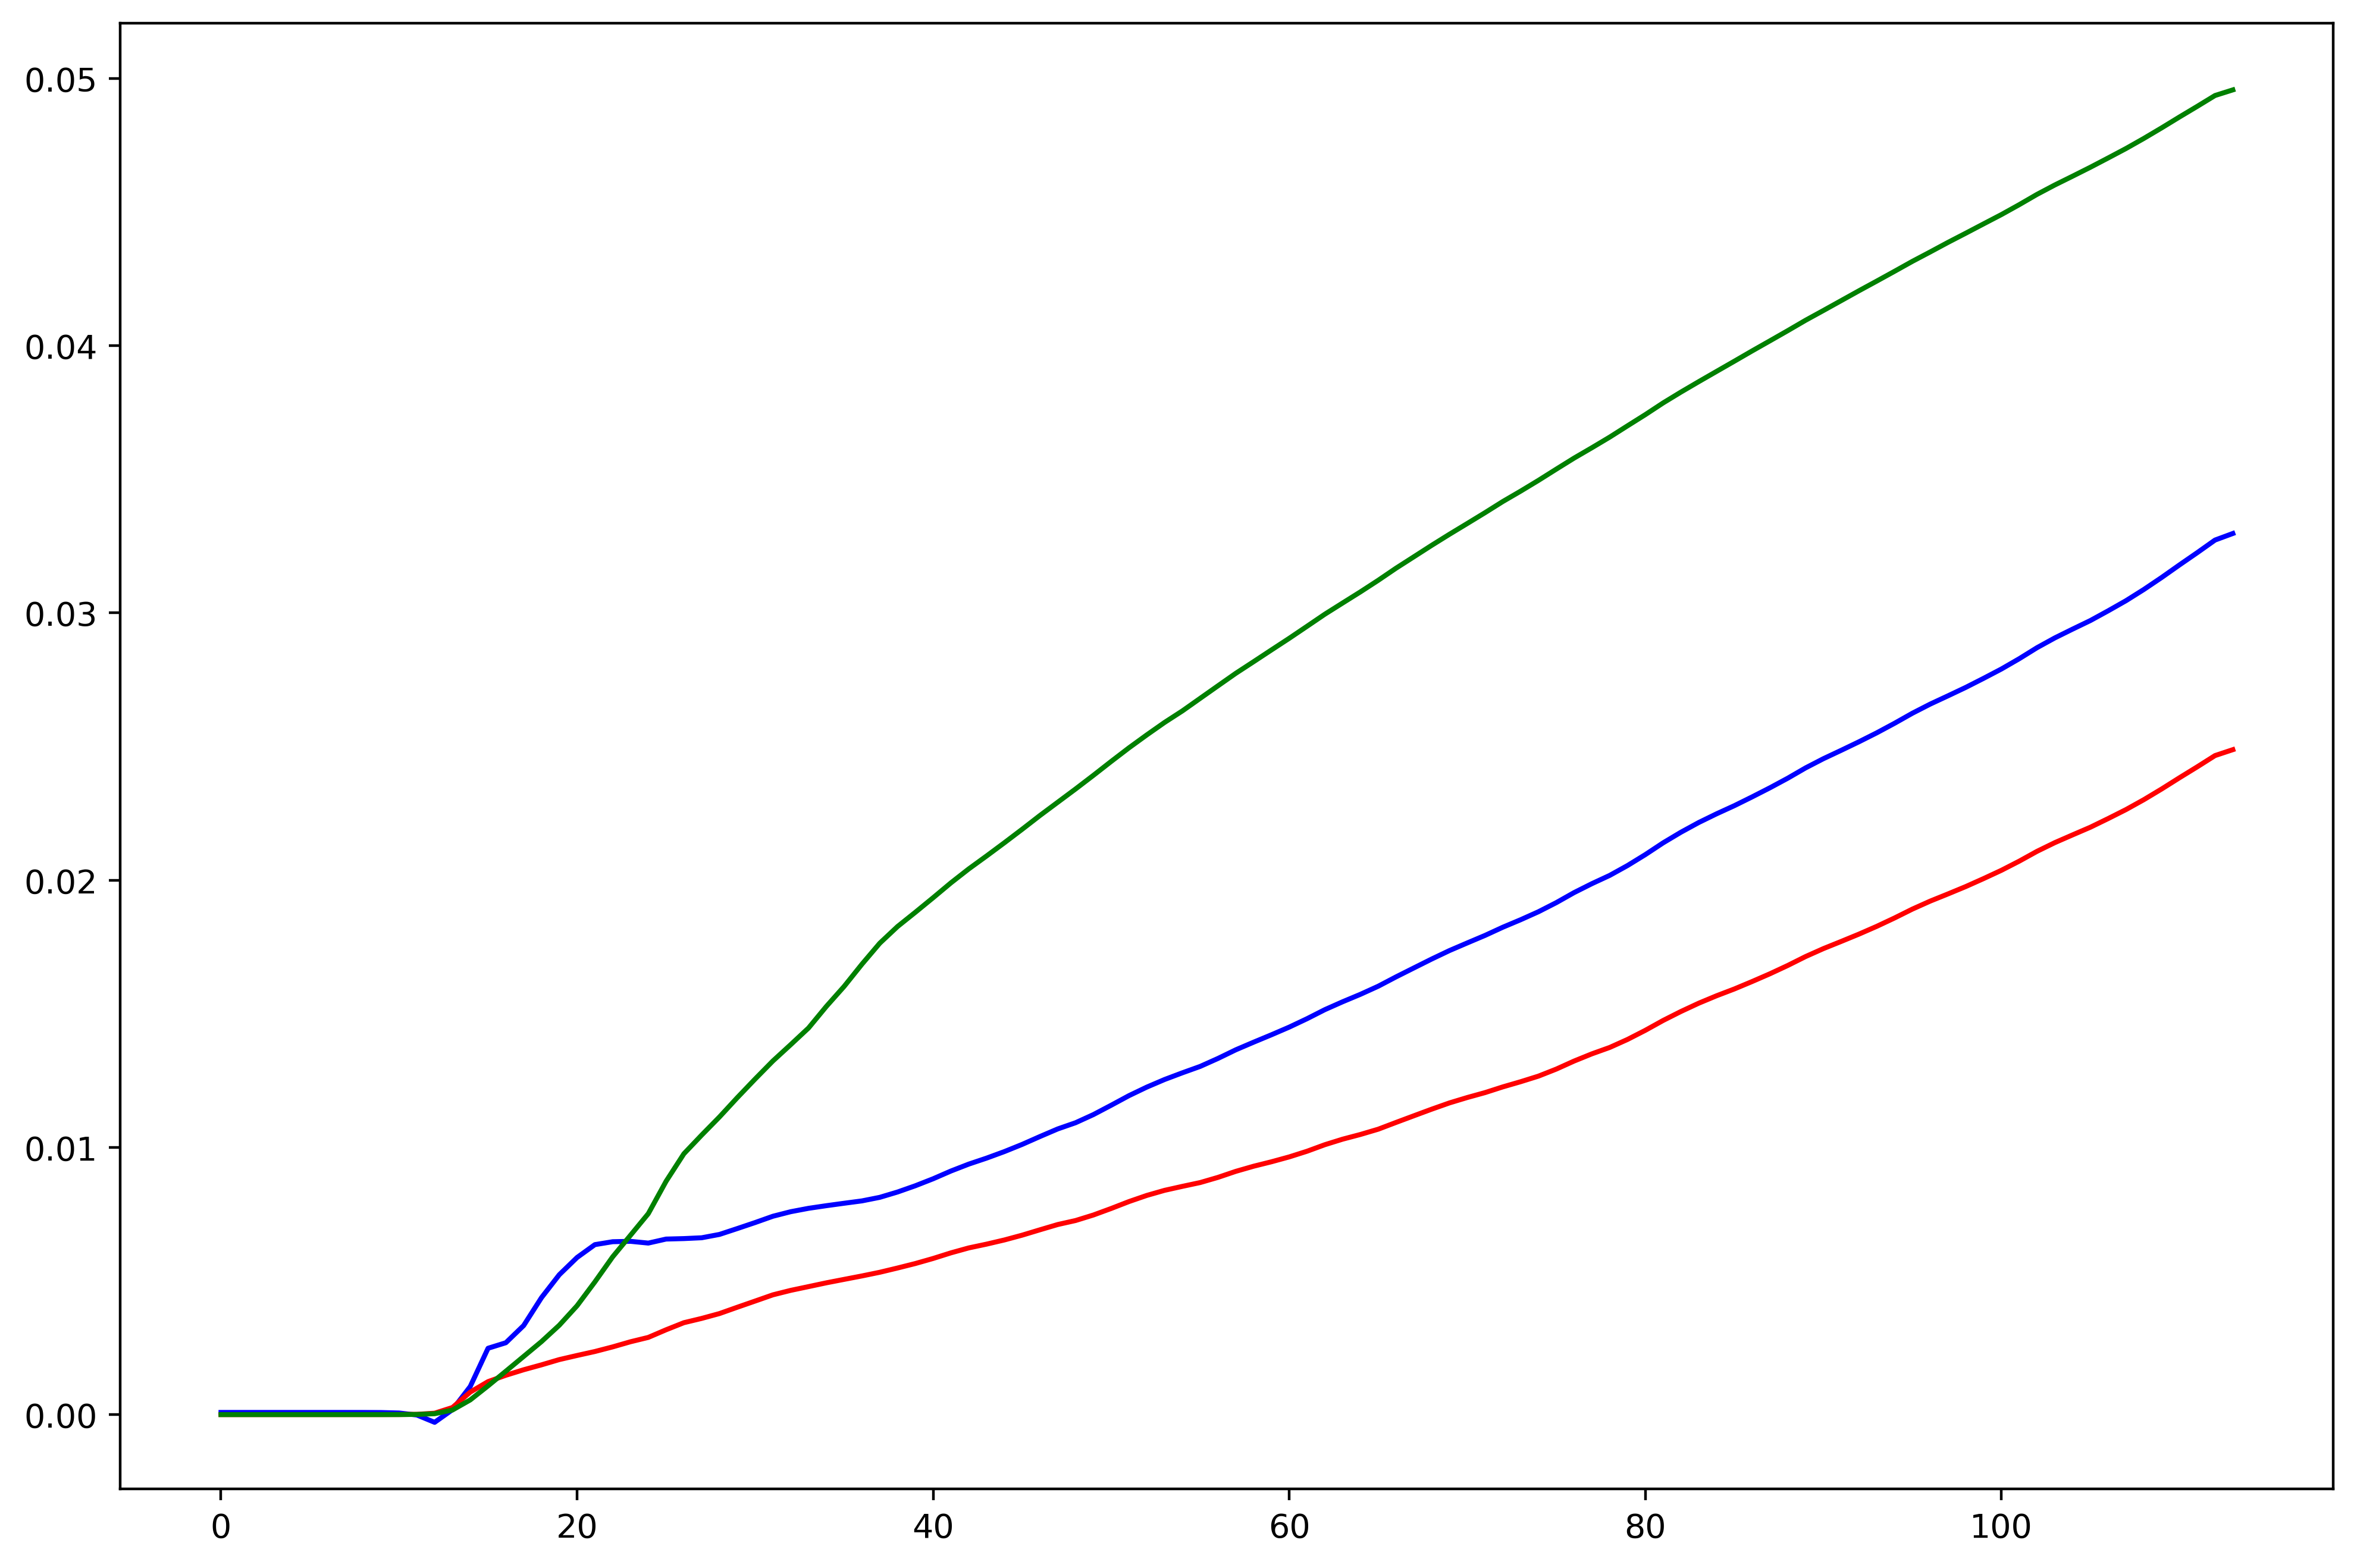

In [36]:
import matplotlib.pyplot as plt
k=7
n=0
#ablation studies for multi-input prediction
inputs.shape
out_ts = []
for i in range(outp.shape[1]):
    out_ts.append(np.mean(outp[k,i,:,:].cpu().detach().numpy()))

label_ts = []
for i in range(lab.shape[1]):
    label_ts.append(np.mean(lab[k,i,:,:].cpu().detach().numpy()))

inp_ts = []
for i in range(inp.shape[1]):
    inp_ts.append(np.mean(inp[k,i,:,:].cpu().detach().numpy()))
plt.figure(figsize=(12,8),dpi=400)
# plt.xlim([20,43])
# plt.yscale('log')
plt.plot(out_ts, c='b') 
plt.plot(label_ts, c='r')
plt.plot(inp_ts, c='g')

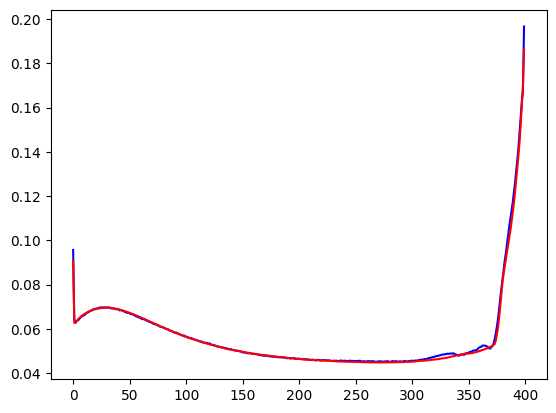

In [73]:
k=0
inputs.shape
out_ts = []
for i in range(outputs.shape[3]):
    out_ts.append(np.mean(outputs[k,:,:,i].cpu().detach().numpy()))

label_ts = []
for i in range(labels.shape[3]):
    label_ts.append(np.mean(labels[k,:,:,i].cpu().detach().numpy()))

inp_ts = []
for i in range(inputs.shape[1]):
    inp_ts.append(np.mean(inputs[k,i,:,:].cpu().detach().numpy()))
    
plt.plot(out_ts, c='b') 
plt.plot(label_ts, c='r')
# plt.plot(inp_ts, c='g')

In [46]:
torch.min(labels)

tensor(4.8552e-22, device='cuda:0')

In [39]:
x.shape
new_x=x.repeat_interleave(5, dim=3)

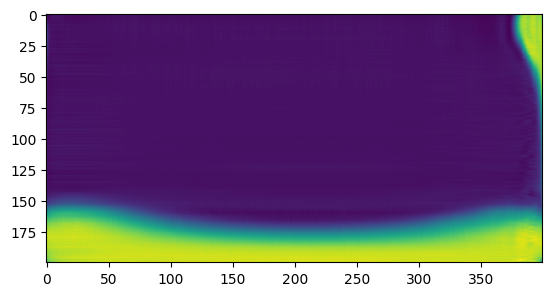

In [129]:
plt.imshow(outp[8,42,:,:].cpu().detach().numpy())

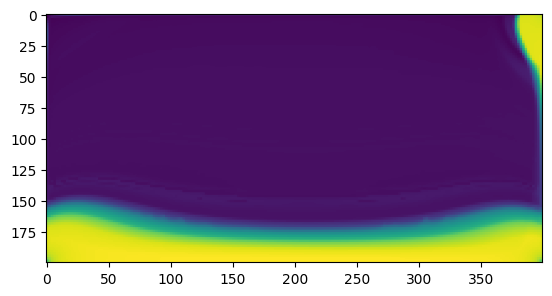

In [130]:
plt.imshow(inp[8,42,:,:].cpu().detach().numpy())

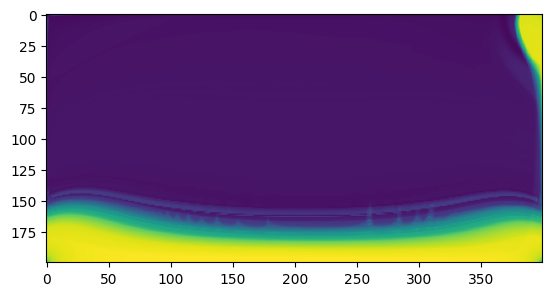

In [131]:
plt.imshow(lab[8,42,:,:].cpu().detach().numpy())

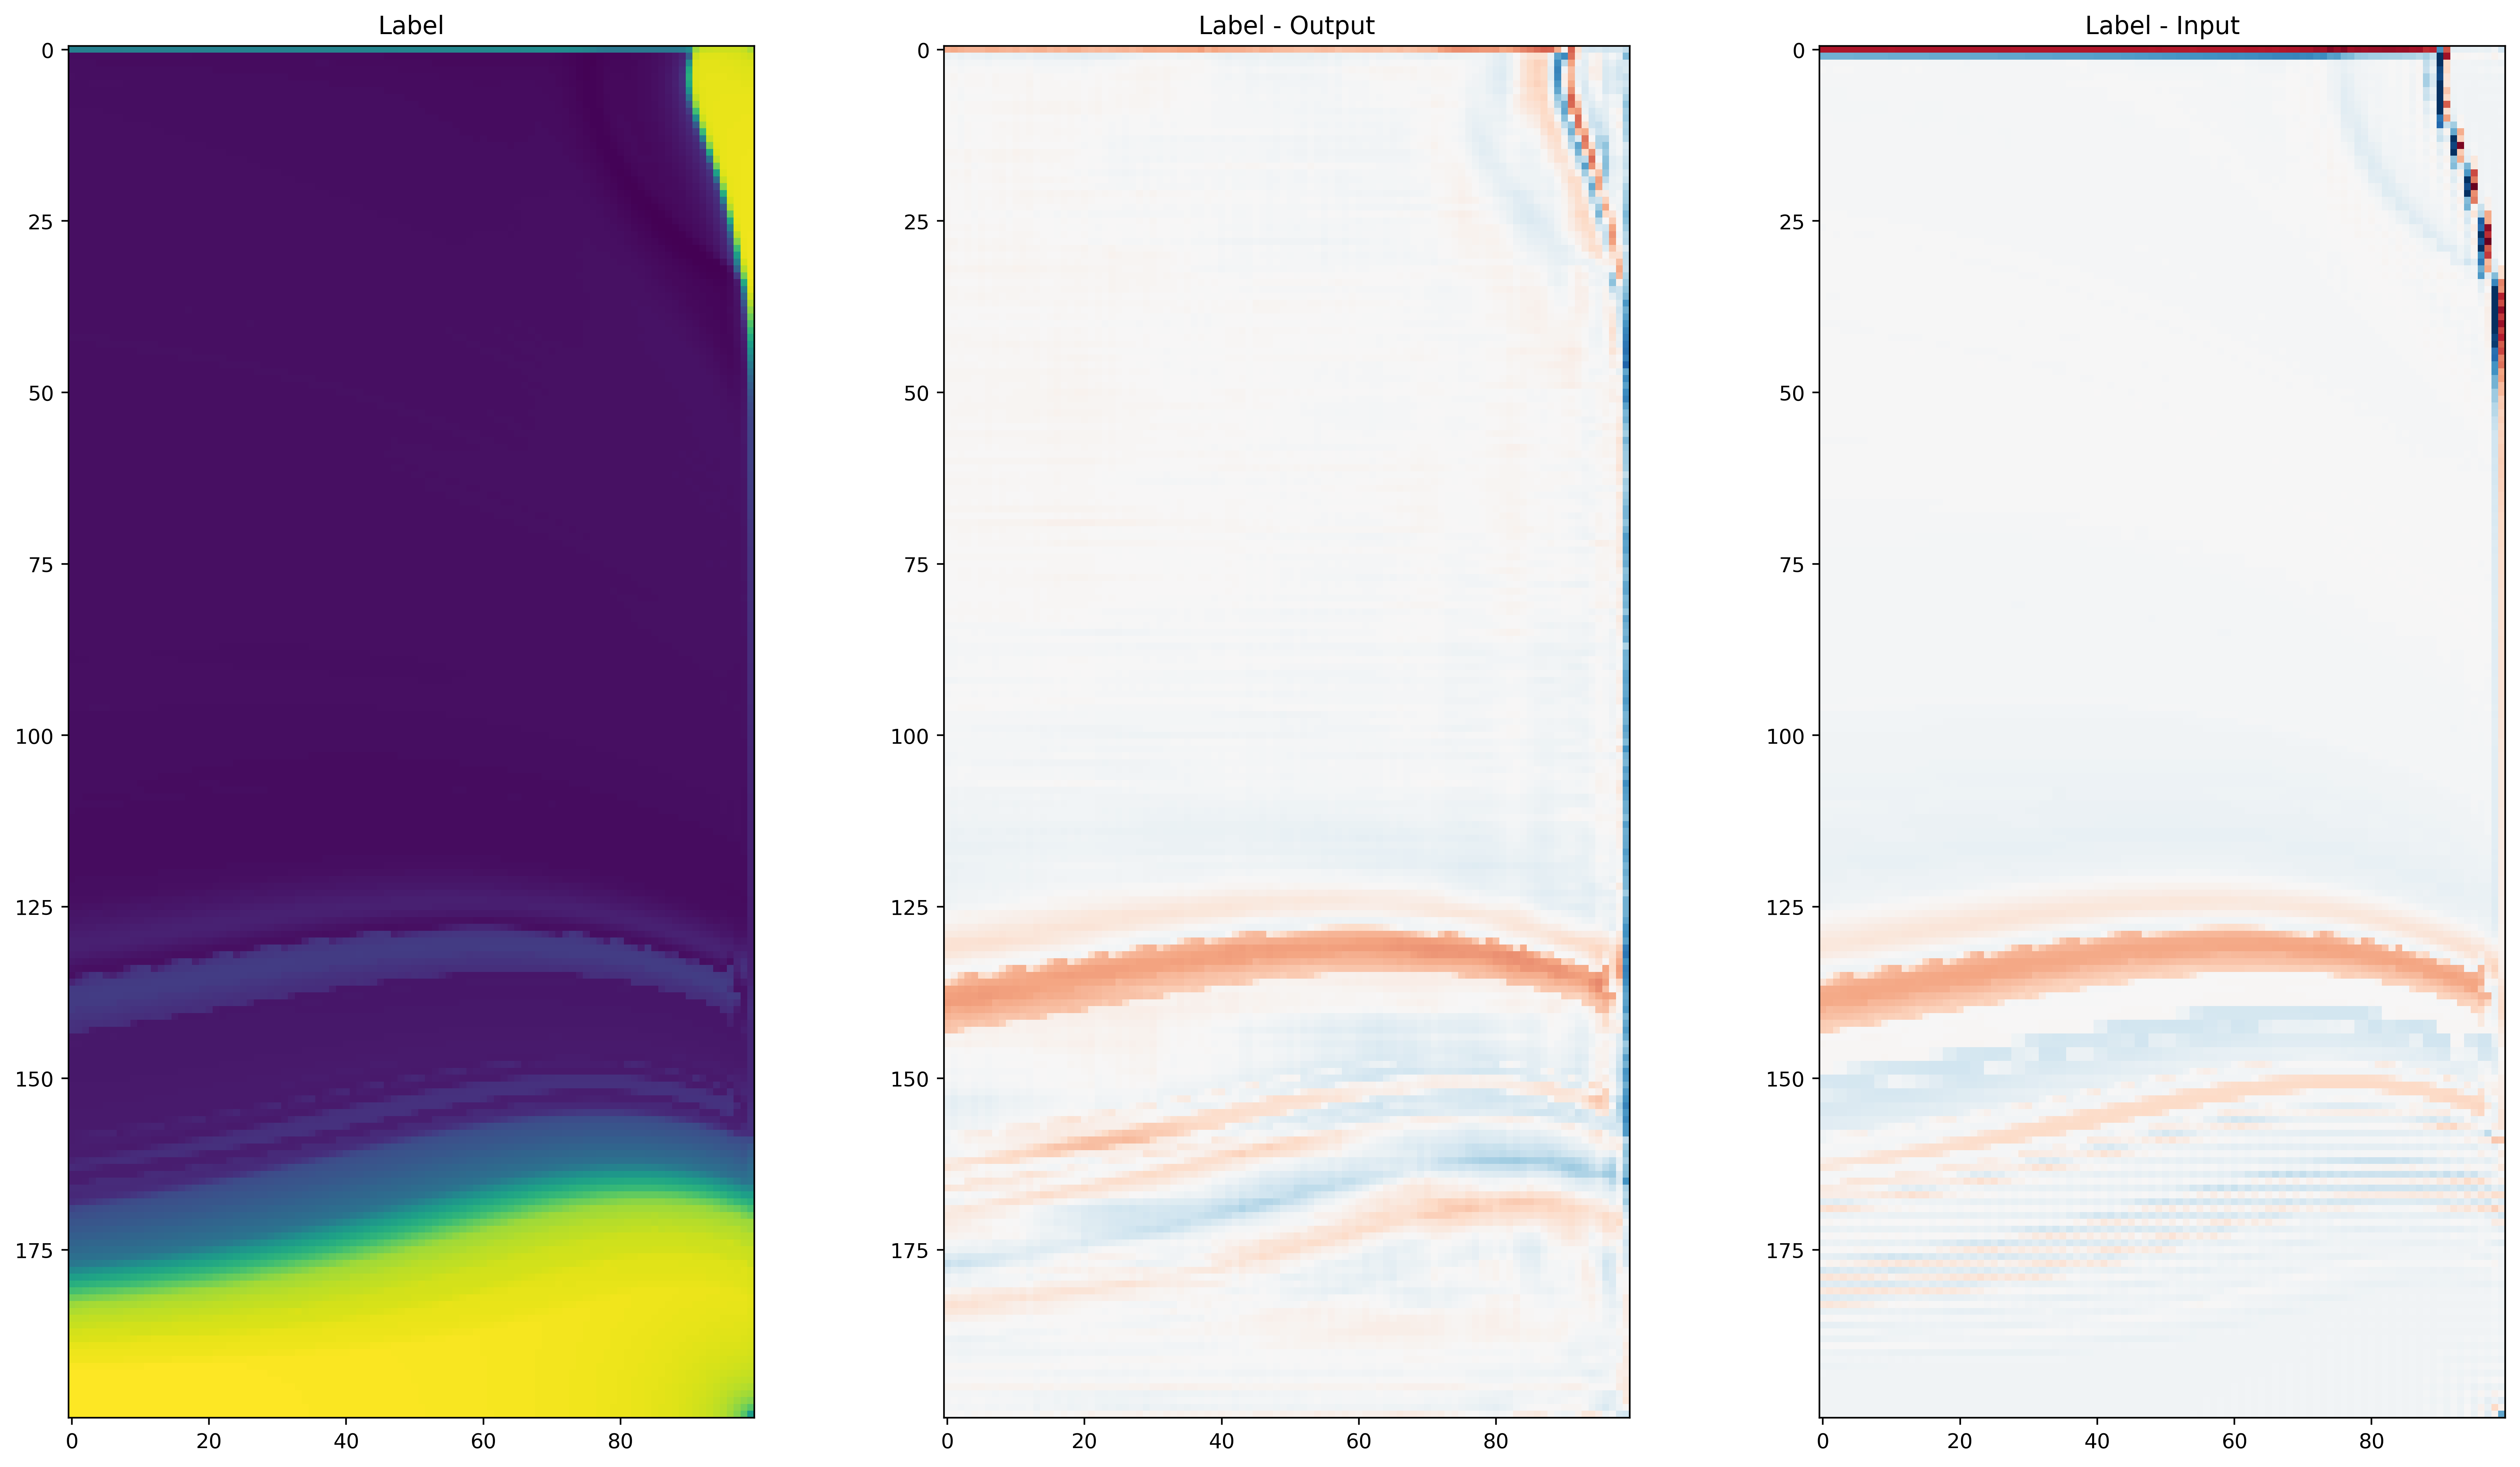

In [224]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3 subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 10), dpi=400)
k=11
t=30
# Plot the label image
im1 = ax1.imshow(lab[k,t,:,300:].cpu().detach().numpy())
ax1.set_title('Label')
# fig.colorbar(im1, ax=ax1)

# Plot the difference between label and output
diff_output = lab[k,t,:,300:].cpu().detach().numpy() - outp[k,t,:,300:].cpu().detach().numpy()
im2 = ax2.imshow(diff_output, cmap='RdBu_r', vmin=-0.15, vmax=0.15)
ax2.set_title('Label - Output')
# fig.colorbar(im2, ax=ax2)

# Plot the difference between label and input
diff_input = lab[k,t,:,300:].cpu().detach().numpy() - inp[k,t,:,300:].cpu().detach().numpy()
im3 = ax3.imshow(diff_input, cmap='RdBu_r', vmin=-0.15, vmax=0.15)
ax3.set_title('Label - Input')
# fig.colorbar(im3, ax=ax3)

# Adjust the layout and display the plot
plt.tight_layout()
# plt.savefig('spatial_comparison.png')
plt.show()

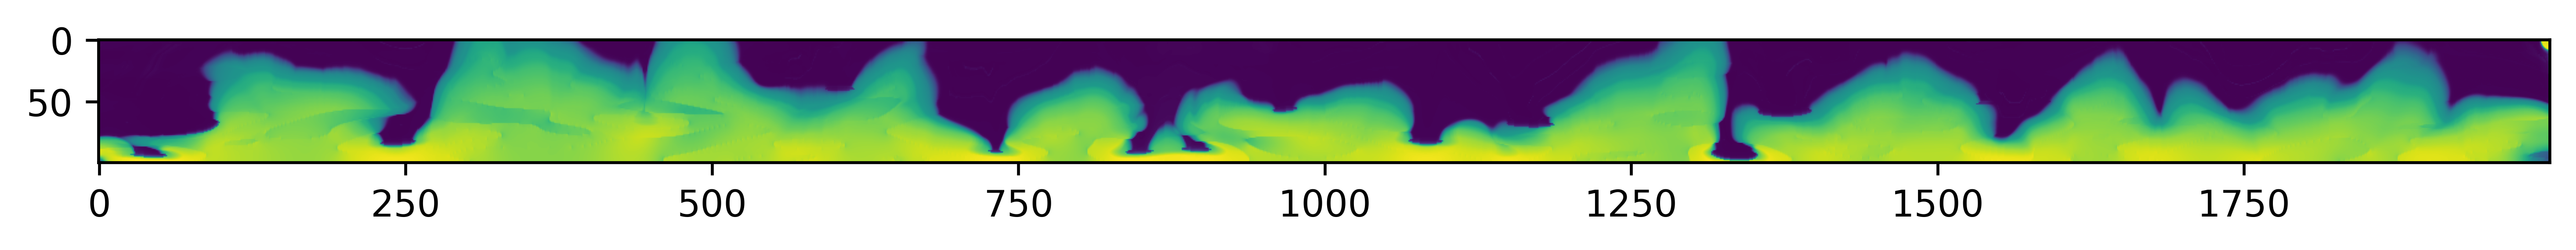

In [40]:
n=1
out = labels[0,100,:,:].cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

#orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

#nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
#print (orig_error, nn_error)

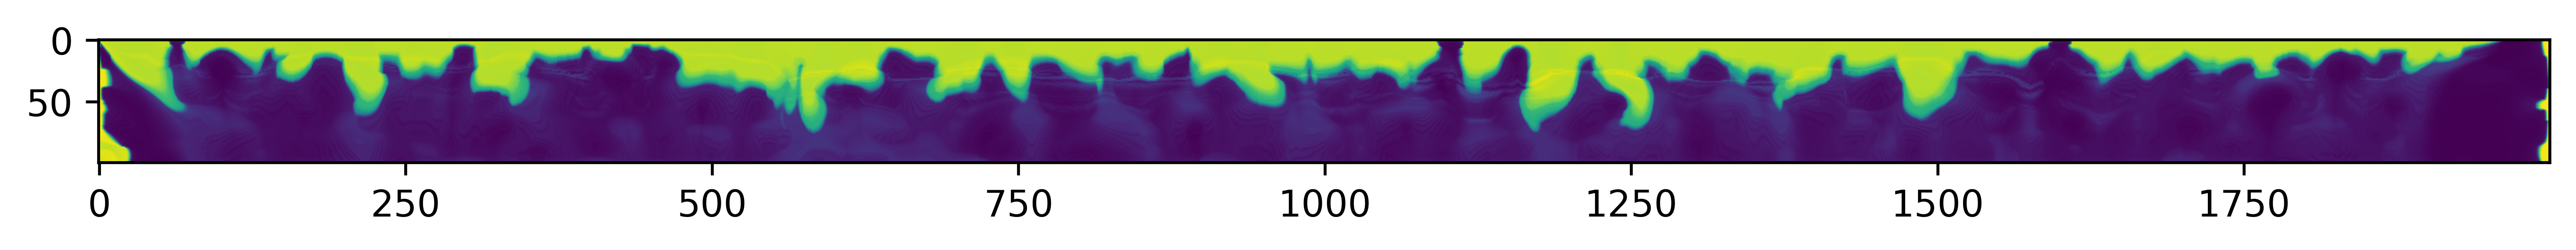

In [27]:
n=1
out = lab[3,40,:,:].cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(12,12), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

#orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

#nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
#print (orig_error, nn_error)

In [ ]:
### test_dataset = VelDataset(h5_files_train[41:], h5_files[41:])
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False,  num_workers=0)

In [70]:
outputs.shape

torch.Size([4, 90, 100, 2000])

In [57]:
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_labels = []
n=5

model1.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.float()
        labels = labels.float()
        #inputs = inputs.repeat_interleave(10, dim=3)
        #labels = labels[0,:,:,:,:].permute(0,2,1,3)
        # Forward pass
        outputs = model1(inputs)
        all_predictions.append(outputs.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        print(criterion2(labels, outputs))
        # inputs = inputs.repeat_interleave(10, dim=3)
        # print (criterion2(labels, inputs))
        # If you have a loss function, compute the loss (optional)
        #orig_error = np.abs(np.mean(inputs.cpu().detach().numpy()) - np.mean(labels.cpu().detach().numpy()))

        #nn_error = np.abs(np.mean(outputs.cpu().detach().numpy()) - np.mean(labels.cpu().detach().numpy()))
        #print (orig_error, nn_error)

C:\Users\marcb\AppData\Local\Temp\ipykernel_5548\437577996.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  low_scale = torch.load(file1)[:,:,:,0].float()
C:\Users\marc

tensor(5.8261, device='cuda:0')


In [60]:
inputs.shape

torch.Size([2, 90, 100, 400, 2])

In [16]:
print((0.0043909806+0.023773938+0.03114998+0.0043200747+0.0049229813+0.0026212687)/6)
print((0.0034722257+0.05977188+0.063873395+0.012106983+0.0037977695+0.0053939596)/6)

0.011863203883333333
0.024736035466666664


In [61]:
all_predictions[0].shape

(1, 90, 100, 2000)

In [62]:
criterion2(labels, outputs)

tensor(2559.6172, device='cuda:0')

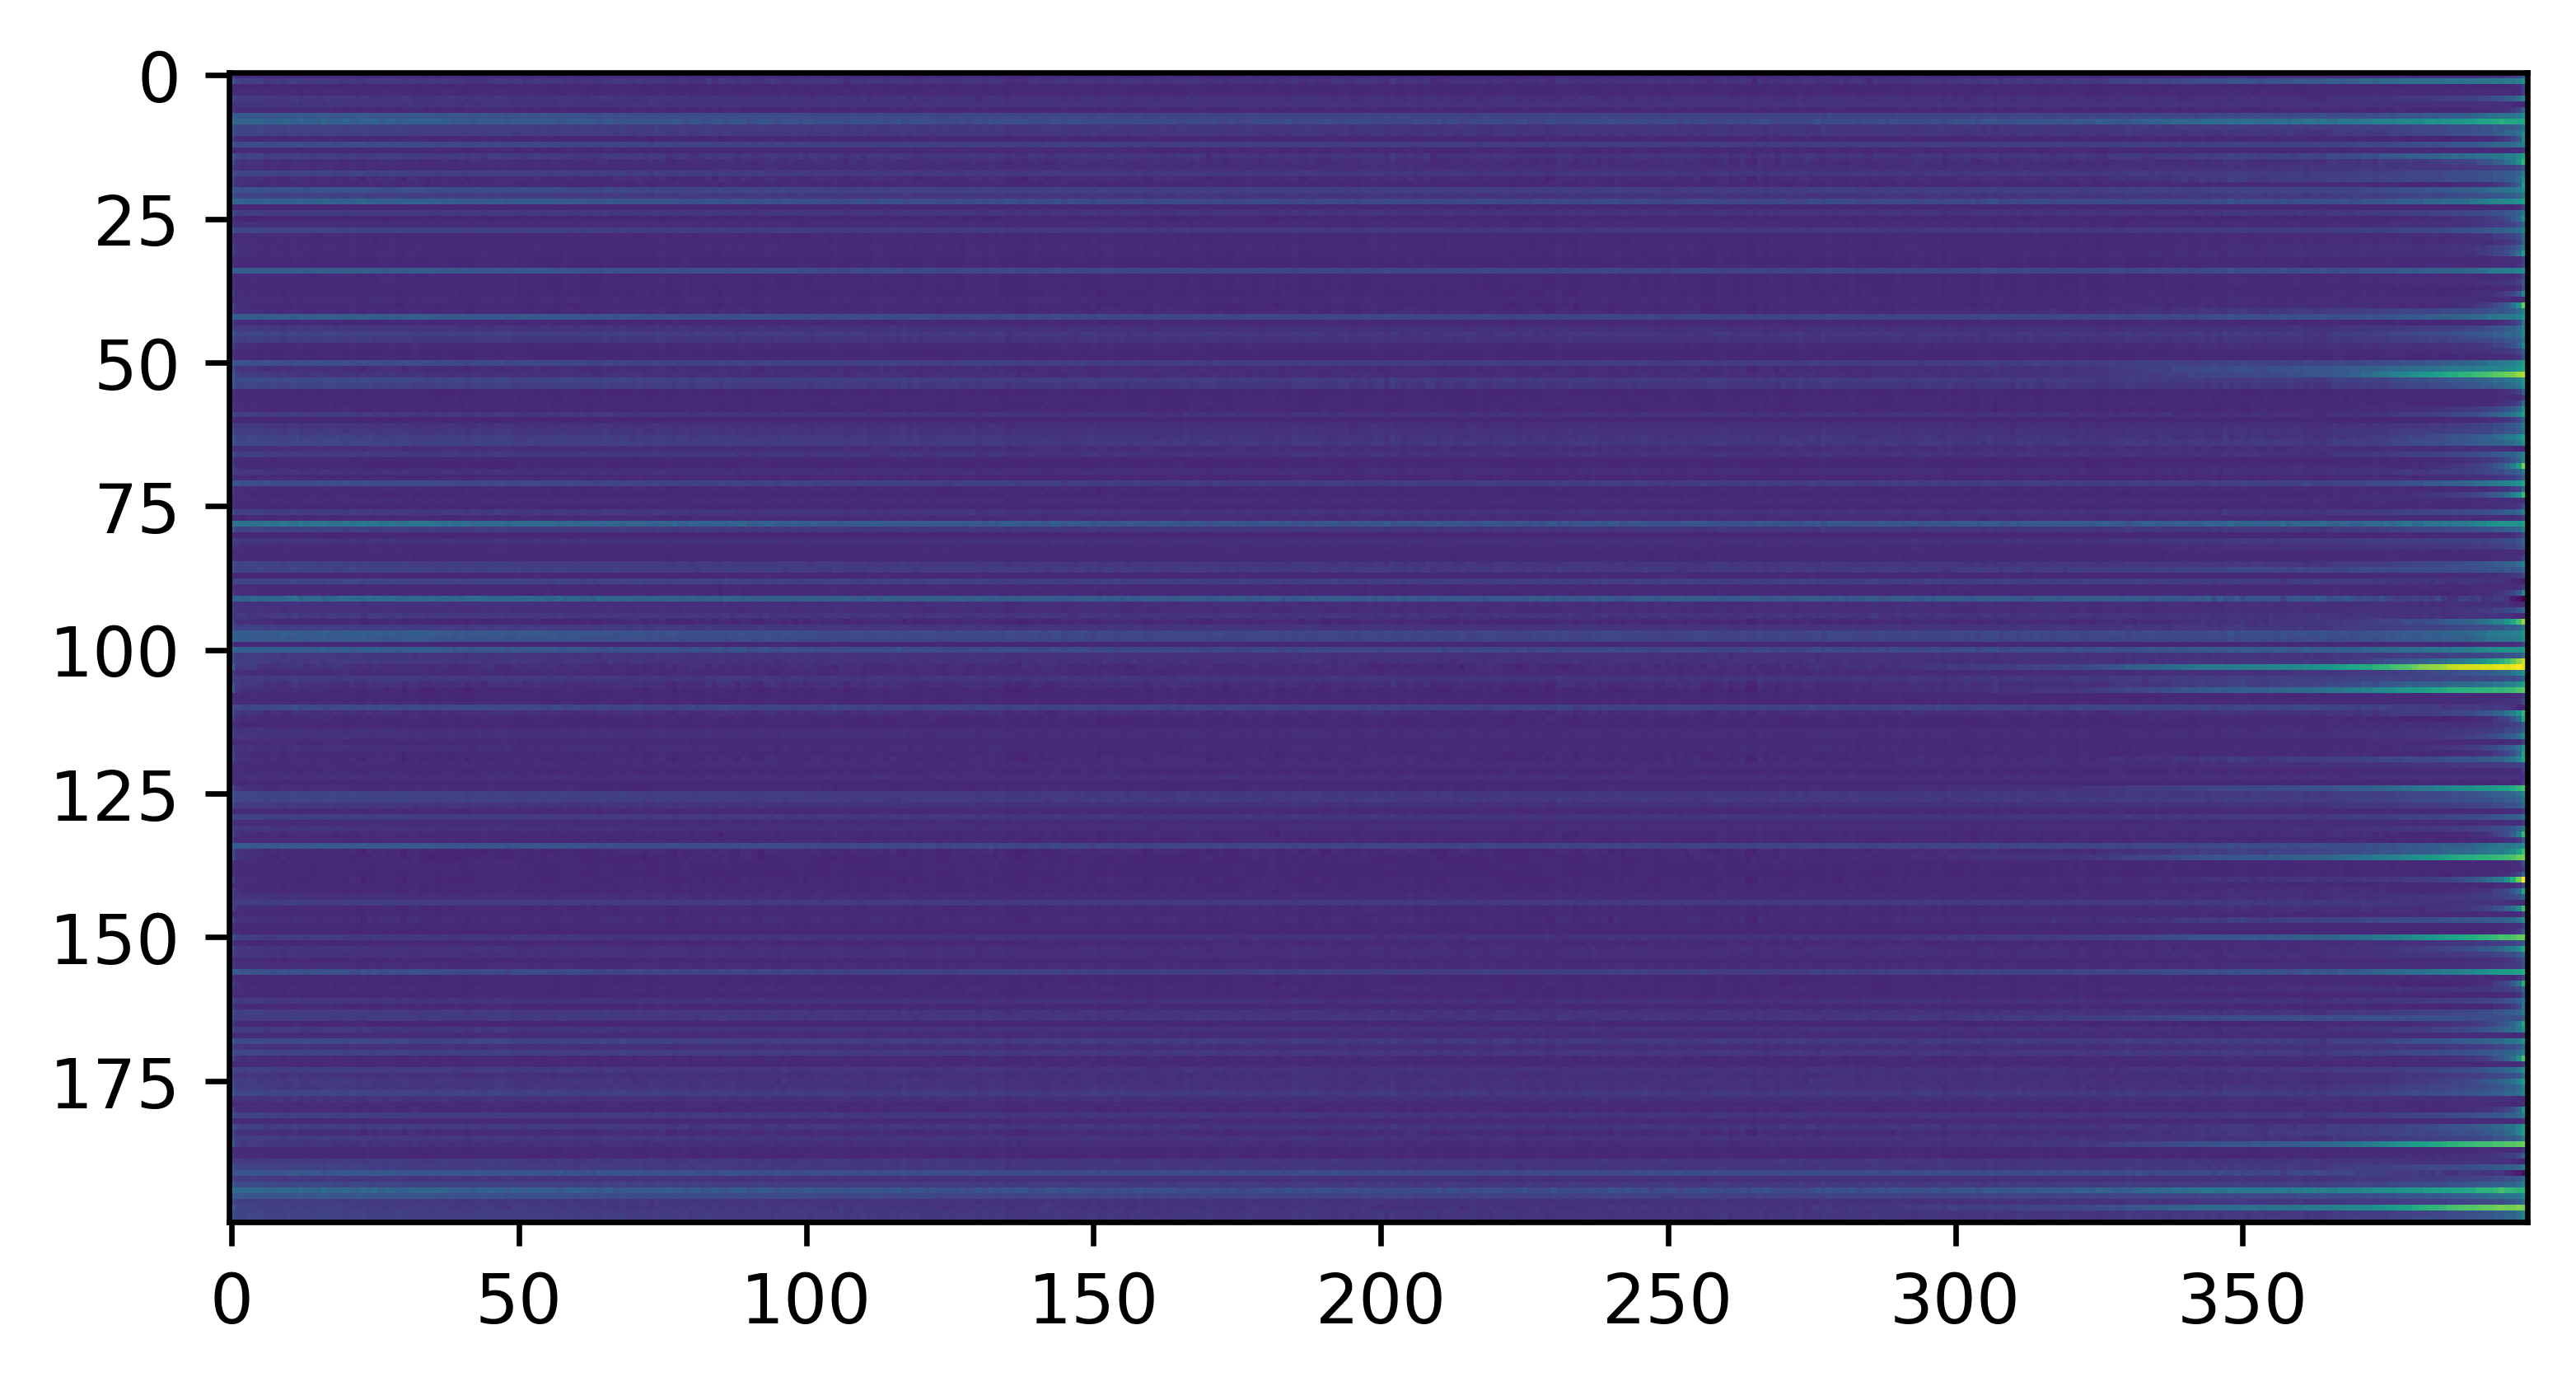

In [62]:
n=4
out = all_predictions[0][0,41,:,:]
#out = all_labels[0][0,89,:,:]

#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(6,6), dpi=600)
plt.imshow(out)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()



In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = UNet3(400, 2000).to(device)
model2 = UNet3(400, 2000).to(device)
model3 = UNet3(400, 2000).to(device)
model4 = UNet3(400, 2000).to(device)
model5 = UNet5(400, 2000).to(device)
model6 = UNet5(400, 2000).to(device)


#model2 = UNet2(400, 800).to(device)

#model3 = UNet2(800, 1200).to(device)

#model4 = UNet2(1200, 1600).to(device)

#model5 = UNet2(1600, 2000).to(device)
model1

UNet3(
  (up1): Conv2d(400, 800, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=6, out_features=12, bias=True)
  (d1): Dropout(p=0.1, inplace=False)
  (up2): Conv2d(800, 1200, kernel_size=(1, 1), stride=(1, 1))
  (fc2): Linear(in_features=12, out_features=1, bias=True)
  (up4): Conv2d(1200, 2000, kernel_size=(1, 1), stride=(1, 1))
)

In [15]:
model_weights_path = 'weights_vel2'
model1.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_press2'
model2.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_por2'
model3.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_crv2'
model4.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_molass2'
model5.load_state_dict(torch.load(model_weights_path))
model_weights_path = 'weights_bio2'
model6.load_state_dict(torch.load(model_weights_path))
model6

UNet5(
  (up1): Conv2d(400, 800, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (d1): Dropout(p=0.1, inplace=False)
  (up2): Conv2d(800, 1200, kernel_size=(1, 1), stride=(1, 1))
  (fc2): Linear(in_features=24, out_features=6, bias=True)
  (up4): Conv2d(1200, 2000, kernel_size=(1, 1), stride=(1, 1))
  (fc3): Linear(in_features=6, out_features=1, bias=True)
)

In [24]:
model7 = UNet4(400, 2000).to(device)
model7

UNet4(
  (fc1): Linear(in_features=6, out_features=6, bias=True)
)

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR


#class CustomDataset(Dataset):
#    def __init__(self, x, target):
#        """
#        Args:
#            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
#        """
#        self.x = torch.tensor(x, dtype=torch.float32)
#        self.target = torch.tensor(target, dtype=torch.float32)#
#
#    def __len__(self):
#        return len(self.x)
#
#    def __getitem__(self, idx):
#        input = self.x[idx]
#        target = self.target[idx]
#        return input, target

#criterion3 = SmoothnessLoss(.1, .1)
#dataset = CustomDataset(x, y)
#dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#criterion1 = DivLoss()
criterion2 = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.0002)
optimizer3 = optim.Adam(model3.parameters(), lr=0.0002)
optimizer4 = optim.Adam(model4.parameters(), lr=0.0002)
optimizer5 = optim.Adam(model5.parameters(), lr=0.0002)
optimizer6 = optim.Adam(model5.parameters(), lr=0.0002)
optimizer7 = optim.Adam(model5.parameters(), lr=0.0002)


gamma = .9999  # The exponential decay factor (adjust as needed)
scheduler1 = ExponentialLR(optimizer1, gamma=gamma)
scheduler2 = ExponentialLR(optimizer2, gamma=gamma)
scheduler3 = ExponentialLR(optimizer3, gamma=gamma)
scheduler4 = ExponentialLR(optimizer4, gamma=gamma)
scheduler5 = ExponentialLR(optimizer5, gamma=gamma)
scheduler6 = ExponentialLR(optimizer6, gamma=gamma)
scheduler7 = ExponentialLR(optimizer7, gamma=gamma)

optimizers = [optimizer1,optimizer2,optimizer3,optimizer4,optimizer5,optimizer6,optimizer7]
schedulers = [scheduler1,scheduler2,scheduler3,scheduler4,scheduler5,scheduler6,scheduler7]
#import gc
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()
model = [model1,model2,model3,model4,model5,model6]
model7.train()
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    
    count=0
    running_loss=0
    for batch in dataloader:
        inputs = batch[0].to(device)
        inputs = inputs.float()
        labels = batch[1].to(device)
        labels = labels.float()
        #labels = labels[0,:,:,:,4].permute(2,1,0)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        outputs = torch.zeros((80,2000,100,6)).to(device)
        for k in range(labels.shape[3]):
            #with torch.no_grad():
            outputs[:,:,:,k] = model[k](inputs)

        #labels1 = labels[:,0:400,:,:]
        #labels2 = labels[:,0:800,:,:]
        #labels3 = labels[:,0:1200,:,:]
        #labels4 = labels[:,0:1600,:,:]
        optimizer1.zero_grad()
        #optimizer2.zero_grad()
        #optimizer3.zero_grad()
        #optimizer4.zero_grad()
        #optimizer5.zero_grad()
        #outputs1 = model1(inputs)
        #outputs2 = model2(outputs1)
        #outputs3 = model3(outputs2)
        #outputs4 = model4(outputs3)
        outputs = model7(outputs)
        #outputs2 = outputs2[:,400:800,:,:]
        #outputs3 = outputs3[:,800:1200,:,:]
        #outputs4 = outputs4[:,1200:1600,:,:]
        
        #loss1 = criterion2(outputs1, labels1)
        #loss2 = criterion2(outputs2, labels2)
        #loss3 = criterion2(outputs3, labels3)
        #loss4 = criterion2(outputs4, labels4)
        loss = criterion2(outputs, labels)

        #loss = (loss1*4+loss2+loss3+loss4+loss5)/8

        loss.backward()
        optimizer1.step()
        #optimizer2.step()
        #optimizer3.step()
        #optimizer4.step()
        #optimizer5.step()
        scheduler1.step()
        ##scheduler2.step()
        #scheduler3.step()
        #scheduler4.step()
        #scheduler5.step()
        count=count+1
        running_loss = running_loss+loss.item()
    #model7.eval()
# Iterate through the test data
    #nn_errors=[]
    #orig_errors=[]
    #with torch.no_grad():
    #    for inputs, labels in test_dataloader:
    #        inputs = inputs.to(device)
    #        labels = labels.to(device)
    #        inputs = inputs.float()
    #        labels = labels.float()
    #        labels = labels[0,:,:,:,:].permute(0,2,1,3)
    #        # Forward pass
    #        outputs = model1(inputs)
    #        #all_predictions.append(outputs.cpu().detach().numpy())
    #        #all_labels.append(labels.cpu().detach().numpy())
    #        # If you have a loss function, compute the loss (optional)
    #        n=0
    #        orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
    
    #        nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
    #        nn_errors.append(nn_error)
    #        orig_errors.append(orig_error)
    #print (np.mean(orig_errors), np.mean(nn_errors))
    current_lr = optimizer1.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count}, Learning Rate: {current_lr:.8f}")

Epoch 1/200, Loss: 159.88739277124404, Learning Rate: 0.00099601
Epoch 2/200, Loss: 153.98396366238595, Learning Rate: 0.00099203
Epoch 3/200, Loss: 153.21422865986824, Learning Rate: 0.00098807
Epoch 4/200, Loss: 152.37736921310426, Learning Rate: 0.00098413
Epoch 5/200, Loss: 151.97827052175998, Learning Rate: 0.00098020
Epoch 6/200, Loss: 151.8371748328209, Learning Rate: 0.00097628
Epoch 7/200, Loss: 151.63196961581707, Learning Rate: 0.00097239
Epoch 8/200, Loss: 151.5796983897686, Learning Rate: 0.00096851
Epoch 9/200, Loss: 151.64396729171276, Learning Rate: 0.00096464
Epoch 10/200, Loss: 151.4676573753357, Learning Rate: 0.00096079
Epoch 11/200, Loss: 151.48888604044913, Learning Rate: 0.00095695
Epoch 12/200, Loss: 151.32529764473438, Learning Rate: 0.00095313
Epoch 13/200, Loss: 151.35672963261604, Learning Rate: 0.00094933
Epoch 14/200, Loss: 151.29406080842017, Learning Rate: 0.00094554
Epoch 15/200, Loss: 151.2871945589781, Learning Rate: 0.00094176
Epoch 16/200, Loss: 151

KeyboardInterrupt: 

In [35]:
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

model7.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.float()
        labels = labels.float()
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        outputs = torch.zeros((80,2000,100,6)).to(device)
        for k in range(labels.shape[3]):
            #with torch.no_grad():
            outputs[:,:,:,k] = model[k](inputs)
        # Forward pass
        #outputs = model7(outputs)
        all_predictions.append(outputs.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        loss = criterion(outputs,labels)
        print ("Loss: ", loss.item())
        # If you have a loss function, compute the loss (optional)
        orig_error = np.abs(np.mean(inputs[0,:,:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,:].cpu().detach().numpy()))

        nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,:].cpu().detach().numpy()))
        print (orig_error, nn_error)

Loss:  2.6761043071746826
0.09839177 0.5566623
Loss:  2.659982442855835
0.12734497 0.61660105
Loss:  2.929009437561035
0.1413343 0.091187716
Loss:  3.2276692390441895
0.026858568 0.7345431
Loss:  2.6161303520202637
0.050297737 0.16991472
Loss:  1.6953140497207642
0.022475481 0.3268901


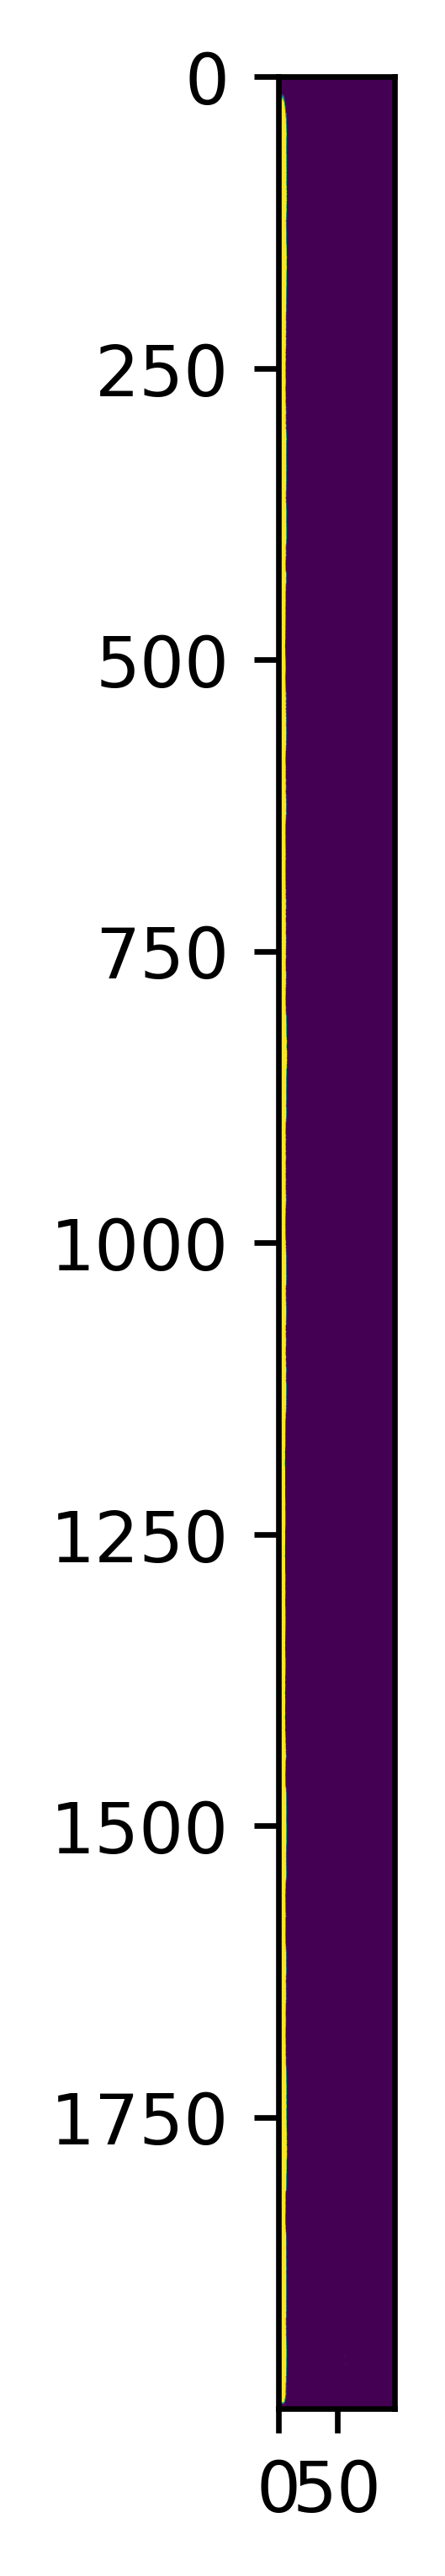

In [62]:
n=0
out = all_predictions[4][70,:,:,n]#.cpu().detach().numpy()
#out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(6,6), dpi=600)
plt.imshow(out, vmin = -.5, vmax=.5)

In [ ]:
import torch
import torch.nn as nn

def aggregate_horizontal_means(tensor):
    """
    Aggregate horizontal means for every 10 rows along the 100-length dimension.
    Args:
        tensor (torch.Tensor): Tensor of shape [batch_size, 100, 2000, 19].
    Returns:
        torch.Tensor: Tensor of shape [batch_size, 10, 19].
    """
    batch_size, _, width, channels = tensor.shape
    aggregated_means = []

    for start_row in range(0, 100, 10):
        # Extract 10-row block and compute mean
        block = tensor[:, start_row:start_row + 10, :, :]
        block_mean = torch.mean(block, dim=2)  # Mean along the width (2000)
        block_mean = torch.mean(block_mean, dim=1)  # Mean along the 10 rows
        aggregated_means.append(block_mean)

    # Combine the means into a single tensor
    aggregated_means_tensor = torch.stack(aggregated_means, dim=1)
    return aggregated_means_tensor

class CustomMSELoss(nn.Module):
    def __init__(self):
        super(CustomMSELoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        # Aggregate horizontal means
        y_pred_agg = aggregate_horizontal_means(y_pred)
        y_true_agg = aggregate_horizontal_means(y_true)

        # Calculate MSE between the aggregated tensors
        return self.mse_loss(y_pred_agg, y_true_agg)



# Example usage
# Assuming y_pred and y_true are your model's output and ground truth tensors respectively
# with shape [batch_size, 100, 2000, 19]
custom_loss = CustomMSELoss()
#loss = custom_loss(y_pred, y_true)

import torch
import torch.nn as nn
import torch.nn.functional as F


class SmoothnessLoss(nn.Module):
    def __init__(self, dx, dy):
        """

        """
        super(SmoothnessLoss, self).__init__()
        self.dx = dx
        self.dy = dy

    def forward(self, v):
        v1 = v[:,:,:,0].permute(0,2,1)
        v2 = v[:,:,:,1].permute(0,2,1)

        # Calculate horizontal and vertical differences
        horizontal_diff = torch.abs(torch.diff(v1, dim=2) / self.dx)
        vertical_diff = torch.abs(torch.diff(v2, dim=1) / self.dy)

        # Calculate the squared differences (L2 norm)
        horizontal_loss = torch.sum(horizontal_diff)
        vertical_loss = torch.sum(vertical_diff)

        # Total loss
        loss = horizontal_loss + vertical_loss
        #if loss > .001:

        return loss

# Example usage with dummy data
# Create sample velocity fields as PyTorch tensors



def calculate_divergence(vx, vy, dx, dy):
    # Use PyTorch's built-in functions for gradient computation
    dvx_dx = torch.diff(vx, dim=1) / dx
    dvy_dy = torch.diff(vy, dim=2) / dy


    # Pad the last dimension to match the original size
    #dvx_dx = F.pad(dvx_dx, (0, 1), "constant", 0)
    #dvy_dy = F.pad(dvy_dy, (0, 0, 0, 1), "constant", 0)

    return dvx_dx[:,:,0:1999] + dvy_dy[:,0:99,:]

class DivLoss(nn.Module):
    def __init__(self):
        super(DivLoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        dx = .1
        dy = dx
        
        ypred_vx = y_pred[:,:,:,0].permute(0,2,1)
        ypred_vy = y_pred[:,:,:,1].permute(0,2,1)
    
        ytrue_vx = y_true[:,:,:,0].permute(0,2,1)
        ytrue_vy = y_true[:,:,:,1].permute(0,2,1)
        
        y_pred_div = calculate_divergence(ypred_vx, ypred_vy, dx, dy)
        y_true_div = calculate_divergence(ytrue_vx, ytrue_vy, dx, dy)

        return torch.mean(torch.abs(torch.abs(y_pred_div)-torch.abs(y_true_div)))

class NormLoss(nn.Module):
    def __init__(self):
        super(NormLoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, y_pred, y_true):
        true_means=[]
        pred_means=[]
        for i in y_pred.shape[3]:
            ypred_flat = torch.flatten(y_pred[:,:,:,i])
            ypred_mean = torch.mean(ypred_flat)
            ypred_std = torch.std(ypred_flat)
            pred_means.append([ypred_mean, ypred_std])

            ytrue_flat = torch.flatten(y_true[:,:,:,i])
            ytrue_mean = torch.mean(ytrue_flat)
            ytrue_std = torch.std(ytrue_flat)
            true_means.append([ytrue_mean, ytrue_std])

        return self.mse_loss(pred_means, true_means)
# Example usage (assuming y_pred and y_true are PyTorch tensors with appropriate dimensions)
# loss_fn = DivLoss()
# loss = loss_fn(y_pred, y_true)



#divergence = calculate_divergence(vx, vy, dx, dy)


In [ ]:
vx = torch.rand(114, 100, 2000)  # Assuming the shape [batch_size, height, width]
vy = torch.rand(114, 100, 2000)

# Assume uniform grid spacing
dx = 0.1  # x-spacing
dy = 0.1  # y-spacing

# Create an instance of the SmoothnessLoss class
smoothness_loss_fn = SmoothnessLoss(dx, dy)

# Calculate smoothness loss for vx and vy
smoothness_loss_vx = smoothness_loss_fn(vx)
smoothness_loss_vy = smoothness_loss_fn(vy)

(smoothness_loss_vx.item(), smoothness_loss_vy.item())

In [ ]:
dx = .1
dy = dx

ypred_vx = outputs[:,:,:,0].permute(0,2,1)
ypred_vy = outputs[:,:,:,1].permute(0,2,1)

ytrue_vx = labels[:,:,:,0].permute(0,2,1)
ytrue_vy = labels[:,:,:,1].permute(0,2,1)

y_pred_div = calculate_divergence(ypred_vx, ypred_vy, dx, dy)
y_true_div = calculate_divergence(ytrue_vx, ytrue_vy, dx, dy)
plt.figure(figsize=(12,12))
plt.imshow(np.abs(y_pred_div.cpu().detach().numpy()[50,:,:]), norm=LogNorm())
plt.colorbar()

In [ ]:
# Assuming you have a CustomDataset class
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR


class CustomDataset(Dataset):
    def __init__(self, x, target):
        """
        Args:
            data (numpy array): A numpy array of shape [N, 100, 200, 19] where N is the number of samples.
        """
        self.x = torch.tensor(x, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        input = self.x[idx]
        target = self.target[idx]
        return input, target

from sklearn.preprocessing import StandardScaler

#scalerx = StandardScaler()
#scalery = StandardScaler()

#x_scaled = scalerx.fit_transform(x.reshape(1, -1))
#y_scaled = scalery.fit_transform(y.reshape(1 -1))

criterion3 = SmoothnessLoss(.1, .1)
dataset = CustomDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(n_channels=100, n_classes=9).to(device)
criterion1 = DivLoss()
criterion2 = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
gamma = 0.99998  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)
#import gc

# Training loop
num_epochs = 40000
for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
         # Assuming you want to compare against the input
        loss2 = criterion2(outputs, labels)
        if epoch < 3000:
            loss1 = criterion1(outputs, labels) 
            loss3 = criterion3(outputs)
            loss = (.2*loss1+loss2*2 + .000000002*loss3)/3
        else:
            loss1 = criterion1(outputs, labels) 
            loss = loss2+.001*loss1
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")



In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0015)
gamma = 0.99994  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)
#import gc

# Training loop
num_epochs = 30000
for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss1 = criterion1(outputs, labels)  # Assuming you want to compare against the input
        loss2 = criterion2(outputs, labels)
        loss3 = criterion3(outputs)
        loss = (loss1*.1+loss2*2 + .000000001*loss3)/3
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")

In [ ]:
criterion = DivLoss()#nn.MSELoss()

criterion(outputs, labels)

In [ ]:
labels[10,:,:,1]

In [ ]:
num_epochs = 30000

dataset = CustomDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
from torch.optim.lr_scheduler import ExponentialLR

# Model, loss, and optimizer

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0012)
gamma = 0.99995  # The exponential decay factor (adjust as needed)
scheduler = ExponentialLR(optimizer, gamma=gamma)

for epoch in range(num_epochs):
    model.train()
    for batch in dataloader:
        inputs = batch[0].to(device)
        labels = batch[1].to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Assuming you want to compare against the input
        loss.backward()
        optimizer.step()
        scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']

    # Print the current learning rate    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Learning Rate: {current_lr:.6f}")


In [ ]:
with h5py.File(h5_files[0], 'r') as file:
    for name in file:
        #if isinstance(file[name], h5py.Group):
        print(file[name])

In [171]:
torch.save(model1.state_dict(), 'resolution_model')

3.9034523e-05 0.006597762


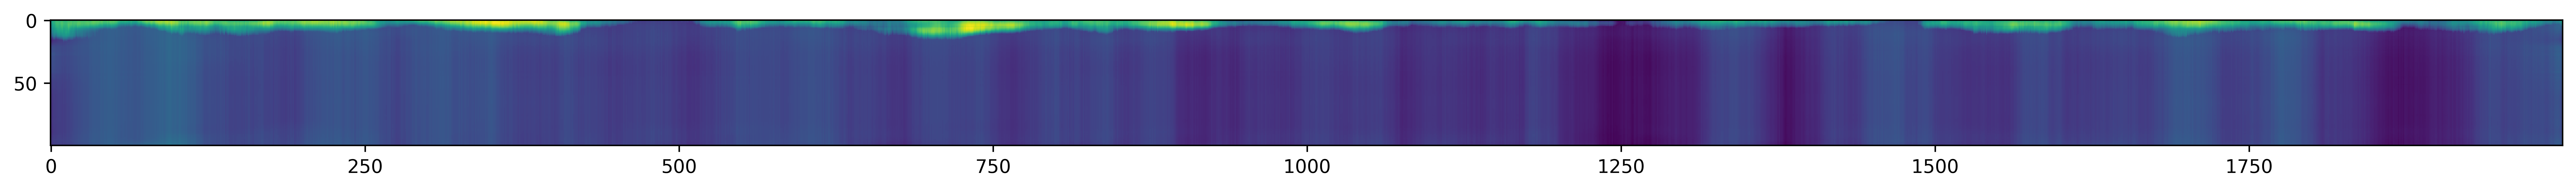

In [18]:
n=6
out = outputs[100,:,:,n].permute(1,0).cpu().detach().numpy()
out[out<=0] = np.min(out[out>0])
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(24,24), dpi=600)
plt.imshow(out)#, norm=LogNorm(.0001,.5))
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

nn_error = np.abs(np.mean(outputs[:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
print (orig_error, nn_error)

In [ ]:
np.max(out)

In [ ]:
# Number of time steps and features to extract
#file_path = '/mnt/data/high_losing_42_11_1xscale.h5'
import h5py
import cv2
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

base_dir = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/'
f_dir = os.listdir(base_dir)
h5_files = []
h5_files_train = []

# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("2x" in filename))):
        h5_files_train.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    if (filename.endswith(".h5")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        h5_files.append(base_dir+filename)
# Run the processing in parallel
h5_files_train =  sorted(
    h5_files_train,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)
h5_files =  sorted(
    h5_files,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)

h5_files_test = h5_files[20:21]
h5_files_train_test = h5_files_train[20:21]
hdf5_file = h5py.File(h5_files_test[0], 'r')
# Fetching the first five time steps
time_steps = sorted(list(hdf5_file.keys()))

# Inspecting the features present in each of these time steps
features_per_time_step = {time_step: list(hdf5_file[time_step].keys()) for time_step in time_steps}


num_time_steps = 115
num_features = 9  # As observed from the dataset

# Initialize the final array with the desired shape [5, 100, 200, 19]
y_test = np.zeros((len(h5_files_test),num_time_steps-1, 100, 2000, num_features))

# Extracting and reshaping data from the first five time steps
for i in range(len(h5_files_test)):
    hdf5_file = h5py.File(h5_files_test[i], 'r')
    for t_idx, time_step in enumerate(time_steps[2:]):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features_per_time_step[time_step]):
            if ('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
                dataset = hdf5_file[time_step][feature]
                y_test[i, t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
                count = count+1

# Checking the shape of the extracted data array


x_test = np.zeros((len(h5_files_train_test),num_time_steps-1, 100, 400, num_features))

# Extracting and reshaping data from the first five time steps
for i in range(len(h5_files_train_test)):
    hdf5_file = h5py.File(h5_files_train_test[i], 'r')
    for t_idx, time_step in enumerate(time_steps[2:]):  # Skipping the first two non-time-step groups
        count=0
        for f_idx, feature in enumerate(features_per_time_step[time_step]):
            if ('O2' not in feature)& ('Perm' not in feature)& ('Material' not in feature)& ('Sat' not in feature)& ('Z' not in feature)& ('biocide' not in feature)& ('ethanol' not in feature)& ('Chubbite' not in feature):
                dataset = hdf5_file[time_step][feature]
                x_test[i, t_idx, :, :, count] = dataset[:, :, 0]#cv2.resize(dataset[:, :, 0], [500,50])  # Reshape and assign
                count = count+1

In [ ]:
#torch.save(model, 'model')
#torch.save(model.state_dict(), 'model_weights2')
x_test.shape


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(n_channels=100, n_classes=9).to(device)


In [ ]:
model_weights_path = 'weights_att'

# Load the model's state dictionary (weights)
model1.load_state_dict(torch.load(model_weights_path))
model1

In [ ]:
scales=[[-3.8411125549317013, 597.4671440974266],
 [-615.1042997637863, 357.84820748247256],
 [0.0, 6822.169871757096],
 [0.0001, 0.6],
 [7.788525219135888, 15.024872883573318],
 [9.998195511764697e-21, 0.0021615209557147423],
 [9.992418077905442e-21, 0.00019222389277486797],
 [1e-10, 353.88041919640534],
 [9.999999999999992e-21, 4.945182939521276]]

for i in range(x_test.shape[4]):
    xmin = scales[i][0]
    xmax = scales[i][1]
    x_test[:,:,:,:,i] = (x_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    y_test[:,:,:,:,i] = (y_test[:,:,:,:,i] - xmin)/(xmax-xmin)
scales

In [ ]:
for i in range(x_test.shape[4]):
    xmin = scales[i][0]
    xmax = scales[i][1]
    x_test[:,:,:,:,i] = (x_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    y_test[:,:,:,:,i] = (y_test[:,:,:,:,i] - xmin)/(xmax-xmin)
    #scales.append([xmin,xmax])
y_test[0,100,0,:,7]

In [ ]:
test_dataset = CustomDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # Adjust batch size as needed

# Define a loss function if needed (e.g., for validation)
criterion = nn.MSELoss()  # Replace with your loss function if needed

# Lists to store predictions and true labels
all_predictions = []
all_true_labels = []

model1.eval()
# Iterate through the test data
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        labels = labels[0,:,:,:,:].permute(0,2,1,3)
        # Forward pass
        outputs = model1(inputs)
        all_predictions.append(output.cpu().detach().numpy())
        all_labels.append(labels.cpu().detach().numpy())
        # If you have a loss function, compute the loss (optional)
        loss = criterion(outputs, labels)
        print (loss)


# Calculate accuracy (or other evaluation metrics)


In [ ]:
n=7
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(24,24), dpi=600)
val = outputs[100,:,:,n].permute(1,0).cpu().detach().numpy()
plt.imshow(val)
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label_test.png')  # Replace 'output.png' with your desired file path and format

field_names[n]

In [ ]:
n=7

orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

nn_error = np.abs(np.mean(outputs[:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
print (orig_error, nn_error)

In [ ]:
print (orig_error, nn_error)

In [ ]:
scales=[[-3.8411125549317013, 597.4671440974266],
 [-615.1042997637863, 357.84820748247256],
 [0.0, 6822.169871757096],
 [0.0001, 0.6],
 [7.788525219135888, 15.024872883573318],
 [9.998195511764697e-21, 0.0021615209557147423],
 [9.992418077905442e-21, 0.00019222389277486797],
 [1e-10, 353.88041919640534],
 [9.999999999999992e-21, 4.945182939521276]]
scales

In [ ]:
import numpy as np

def calculate_divergence(vx, vy, dx, dy):
    """
    Calculate the divergence of a 2D velocity field using a forward-looking finite difference scheme.
    
    Parameters:
    vx: 2D array of velocity in the x-direction
    vy: 2D array of velocity in the y-direction
    dx: Grid spacing in the x-direction
    dy: Grid spacing in the y-direction
    
    Returns:
    divergence: 2D array of divergence values
    """
    # Get the dimensions of the velocity field
    rows, cols = vx.shape

    # Initialize an array to store divergence
    divergence = np.zeros((rows, cols))

    # Calculate divergence using forward differences
    # For the edges, we use backward differences to avoid index out of range
    for i in range(rows):
        for j in range(cols):
            dvx_dx = (vx[i, min(j+1, cols-1)] - vx[i, j]) / dx
            dvy_dy = (vy[min(i+1, rows-1), j] - vy[i, j]) / dy
            divergence[i, j] = dvx_dx + dvy_dy

    return divergence

# Example usage with dummy data
# Create sample velocity fields
#vx = outputs[100,:,:,0].permute(1,0).cpu().detach().numpy()

#vy = outputs[100,:,:,1].permute(1,0).cpu().detach().numpy()


# Assume uniform grid spacing
#dx = 1  # x-spacing
#dy = 1  # y-spacing

# Calculate divergence
#divergence = calculate_divergence(vx, vy, dx, dy)
#divergence


In [ ]:
mse=nn.MSELoss()

In [ ]:
mse(1,1)

In [ ]:
scales_train=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        scales_train.append(i.split('_')[7][0])
    else:
        scales_train.append(i.split('_')[6][0])
    
scales=[]
for i in h5_files:
    if 'high_gaining' in i:
        scales.append(i.split('_')[7][0])
    else:
        scales.append(i.split('_')[6][0])
scales

In [ ]:
import h5py
import cv2

base_dir = '/home/mbadhan/Desktop/mberghouse/PFLOTRAN/one_deeper/input_files/'
f_dir = os.listdir(base_dir)
h5_files = []
h5_files_train = []

# Iterate over all files in the directory
for filename in f_dir:
    if (filename.endswith(".h5")) & ((("2x" in filename))):
        h5_files_train.append(base_dir+filename)
#     if (filename.endswith(".h5")) & (("8x" in filename)):
#         if (("10_5" not in filename) & ("20_20" not in filename)):
#             h5_files_train.append(base_dir+filename)
    if (filename.endswith(".h5")) & ((("10x" in filename))):
#         if (("10_5" in filename) | ("20_20" in filename)):
        h5_files.append(base_dir+filename)
# Run the processing in parallel
h5_files_train =  sorted(
    h5_files_train,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)
h5_files =  sorted(
    h5_files,
    key=lambda x: tuple(map(int, x.split('high_losing_')[1].split('_')[:2]))
)

perm_covar=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        perm_covar.append(int(i.split('_')[5])/int(i.split('_')[6]))
    else:
        perm_covar.append(int(i.split('_')[4])/int(i.split('_')[5]))
perm_covar    

In [ ]:
perm_covar=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        perm_covar.append(int(i.split('_')[5])/int(i.split('_')[6]))
    else:
        perm_covar.append(int(i.split('_')[4])/int(i.split('_')[5]))
perm_covar   

max_l=[]
for i in h5_files_train:
    if 'high_gaining' in i:
        max_l.append(np.max([int(i.split('_')[5]),int(i.split('_')[6])]))
    else:
        max_l.append(np.max([int(i.split('_')[4]),int(i.split('_')[5])]))
max_l

growth_rates=[]
rate_c=[]
rate_d=[]
exp_b = []
for i in range(len(h5_files)):
    file_path = h5_files[i][:-3]+'.in'
    #print (file_path)
    with open(file_path, 'r') as file:
        lines = file.readlines()
    gr = float(lines[79].split()[1].replace('d', 'e'))
    c = float(lines[81].split()[1].replace('d', 'e'))
    d = float(lines[94].split()[1].replace('d', 'e'))
    b = float(lines[65].split()[1])
    growth_rates.append(gr)
    rate_c.append(c)
    rate_d.append(d)
    exp_b.append(b)


tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
count=0
tag_scales = []
for i in tags:
    xmax = np.max(i)
    xmin = np.min(i)
    tags[count] = (i-xmin)/(xmax-xmin)
    tag_scales.append([xmin, xmax])
    count = count+1

tags_small = np.zeros([6,114,100,400,1)
for i in range(len(h5_files)):
    tags_small[i,:,0:16, :, :] = torch.full((1,114,16,400,1),tags[0][i])
    tags_small[i,:,16:32, :, :] = torch.full((1,114,16,400,1),tags[1][i])
    tags_small[i,:,32:48, :, :] = torch.full((1,114,16,400,1),tags[2][i])
    tags_small[i,:,48:64, :, :] = torch.full((1,114,16,400,1),tags[3][i])
    tags_small[i,:,64:80, :, :] = torch.full((1,114,16,400,1),tags[4][i])
    tags_small[i,:,80:, :, :] = torch.full((1,114,20,400,1),tags[5][i])

tags_big = torch.copy(tags_small)

In [ ]:


tags =[rate_c, rate_d, exp_b, max_l, perm_covar, growth_rates]
count=0
tag_scales = []
for i in tags:
    xmax = np.max(i)
    xmin = np.min(i)
    tags[count] = (i-xmin)/(xmax-xmin)
    tag_scales.append([xmin, xmax])
    count = count+1


In [ ]:
tags_small = np.zeros([6,114,100,400,1)
for i in range(len(h5_files)):
    tags_small[i,:,0:16, :, :] = torch.full((1,114,16,400,1),tags[0][i])
    tags_small[i,:,16:32, :, :] = torch.full((1,114,16,400,1),tags[1][i])
    tags_small[i,:,32:48, :, :] = torch.full((1,114,16,400,1),tags[2][i])
    tags_small[i,:,48:64, :, :] = torch.full((1,114,16,400,1),tags[3][i])
    tags_small[i,:,64:80, :, :] = torch.full((1,114,16,400,1),tags[4][i])
    tags_small[i,:,80:, :, :] = torch.full((1,114,20,400,1),tags[5][i])

tags_big = torch.copy(tags_small)
#torch.concat(x,tags_small)

In [ ]:
for i in range(len(dfs)):
    print (i,len(dfs_train[i]))

In [ ]:
h5_files

In [ ]:
import numpy as np
for i in range(len(dfs)):
    #rate b_1 (growth rate)
    #rate_c
    #exp_b
    #rate d_1 (carbon reuse)
    dfs[i]['sim_id']=i
    #dfs[i]['scale']=scales[i]
   # if 'gaining' in h5_files[i]:
   #     dfs[i]['type_id']=0
   # if 'high_gaining' in h5_files[i]:
   #     dfs[i]['type_id']=1
   # if 'losing' in h5_files[i]:
   #     dfs[i]['type_id']=2
   # if 'highlosing' in h5_files[i]:
   #     dfs[i]['type_id']=3
    dfs[i]['perm_covar']=perm_covar[i]
    dfs[i]['max_l']=max_l[i]
    perm_values = dfs[i]["Permeability_X [m^2]"].values
    if perm_covar[i]>1:
        k_eff =np.mean(perm_values.size / np.sum(1.0 / perm_values))
    else:
        k_eff = np.mean(perm_values)

    #dfs[i]['k_eff']=k_eff
    dfs[i]['growth_rates']=growth_rates[i]
    dfs[i]['rate_c']=rate_c[i]
    dfs[i]['rate_d']=rate_d[i]
    dfs[i]['exp_b']=exp_b[i]

for i in range(len(dfs_train)):
    dfs_train[i]['sim_id']=i
    #dfs_train[i]['scale']=scales_train[i]
    #if 'gaining' in h5_files[i]:
    #    dfs_train[i]['type_id']=0
    #if 'high_gaining' in h5_files[i]:
        #print (i[1].fname)
    #    dfs_train[i]['type_id']=1
    #if 'losing' in h5_files[i]:
    #    dfs_train[i]['type_id']=2
    #if 'highlosing' in h5_files[i]:
    #    dfs_train[i]['type_id']=3
#     if i >= 33:
#         dfs[i]['sim_id']=4
#     dfs[i]['sim_id2']=i
    
    dfs_train[i]['perm_covar']=perm_covar[i]
#     dfs[i]['gaining']=gaining[i]
#     dfs[i]['losing']=losing[i]
    dfs_train[i]['max_l']=max_l[i]
    #dfs[i]['NL']=NL[i]
    perm_values = dfs_train[i]["Permeability_X [m^2]"].values
    #if perm_covar[i]>1:
    #    k_eff =np.mean(perm_values.size / np.sum(1.0 / perm_values))
    #else:
    #    k_eff = np.mean(perm_values)

    #dfs_train[i]['k_eff']=k_eff
    #dfs_train[i]['k_eff']=k_eff
    dfs_train[i]['growth_rates']=growth_rates[i]
    dfs_train[i]['rate_c']=rate_c[i]
    dfs_train[i]['rate_d']=rate_d[i]
    dfs_train[i]['exp_b']=exp_b[i]
    

combined_df = pd.concat(dfs)
combined_df_train = pd.concat(dfs_train)
combined_df
final_data = np.array(combined_df)
final_data_train = np.array(combined_df_train)
x = np.delete(final_data_train, [1,2,5,7,8,15,16], 1)
target = np.delete(final_data, [1,2,5,7,8,15,16], 1)
 
#x_test = np.delete(final_data_train, [1,2,5,7,8,14,15,16,19], 1)
# #target = np.delete(final_data, [1,2,5,7,8,14,15,16,19], 1)
# #x = np.delete(final_data, [3, 5, 6, 11, 12, 13, 16,17,18,19], 1)
# y_train = final_data_train[:, 13]
# y_test = final_data[:, 13]
print (x.shape, target.shape)

In [ ]:
dfs_train[0].iloc[1,9:]


In [ ]:
dfs_train[0]